# Wave Energy Farm via supervised ML


data source: https://archive.ics.uci.edu/dataset/882/large-scale+wave+energy+farm

# 1. Import Data

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#pd.options.display.max_columns = 304


In [2]:


# import perth_49
df_perth_49 = pd.read_csv("WEC_Perth_49.csv")


# import perth_100
df_perth_100 = pd.read_csv("WEC_Perth_100.csv")


# import sydney_49
df_sydney_49 = pd.read_csv("WEC_Sydney_49.csv")


# import sydney_100
df_sydney_100 = pd.read_csv("WEC_Sydney_100.csv")

In [172]:
df_perth_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.0,0.0,546.16,37.50,489.79,74.88,432.47,112.05,650.0,0.0,700.00,0.00,750.00,0.00,800.0,0.00,850.0,0.0,900.00,0.00,950.00,0.00,1000.0,0.00,1000.0,200.0,946.16,237.50,889.79,274.88,832.47,312.05,200.0,400.0,146.16,437.50,89.79,474.88,0.0,612.05,400.0,400.0,346.16,437.50,289.79,474.88,232.47,512.05,600.0,400.0,546.16,437.50,489.79,474.88,432.47,512.05,800.0,400.0,746.16,437.50,689.79,474.88,632.47,512.05,200.0,600.0,146.16,637.50,89.79,674.88,0.0,762.05,600.0,600.0,546.16,637.50,489.79,674.88,432.47,712.05,200.0,800.0,146.16,837.50,89.79,874.88,32.47,912.05,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Perth,49,0.87,4102461.43
1,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,700.00,0.00,750.00,0.00,800.0,0.00,850.0,0.0,900.00,0.00,950.00,0.00,1000.0,0.00,1000.0,200.0,946.16,237.50,889.79,274.88,832.47,312.05,200.0,400.0,146.16,437.50,89.79,474.88,0.0,612.05,400.0,400.0,346.16,437.50,289.79,474.88,232.47,512.05,600.0,400.0,546.16,437.50,489.79,474.88,432.47,512.05,800.0,400.0,746.16,437.50,689.79,474.88,632.47,512.05,197.0,559.0,146.16,637.50,89.79,674.88,0.0,762.05,600.0,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.0,807.0,146.16,837.50,89.79,874.88,32.47,912.05,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Perth,49,0.87,4103361.41
2,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,697.00,3.00,750.00,0.00,800.0,0.00,850.0,0.0,900.00,0.00,950.00,0.00,1000.0,0.00,1000.0,200.0,946.16,237.50,889.79,274.88,832.47,312.05,200.0,400.0,146.16,437.50,89.79,474.88,0.0,612.05,400.0,400.0,346.16,437.50,289.79,474.88,232.47,512.05,600.0,400.0,546.16,437.50,489.79,474.88,432.47,512.05,800.0,400.0,746.16,437.50,689.79,474.88,632.47,512.05,197.0,559.0,146.16,637.50,89.79,674.88,0.0,762.05,600.0,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.0,807.0,146.16,837.50,89.79,874.88,32.47,912.05,400.0,800.0,346.16,837.50,289.79,874.88,232.47,912.05,0.0,1010.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Perth,49,0.87,4103680.44
3,593.0,12.0,546.16,37.50,489.79,74.88,432.47,112.05,644.0,8.0,697.00,3.00,750.00,0.00,800.0,0.00,850.0,0.0,900.00,0.00,950.00,0.00,1000.0,0.00,1000.0,200.0,946.16,237.50,889.79,274.88,832.47,312.05,200.0,400.0,146.16,437.50,89.79,474.88,0.0,612.05,400.0,400.0,346.16,437.50,289.79,474.88,251.00,511.00,600.0,400.0,546.16,437.50,489.79,474.88,432.47,512.05,800.0,400.0,746.16,437.50,689.79,474.88,632.47,512.05,197.0,559.0,146.16,637.50,89.79,674.88,0.0,762.05,600.0,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.0,807.0,146.16,837.50,89.79,874.88,32.47,912.05,400.0,800.0,346.16,837.50,289.7

In [173]:
df_perth_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1000.0,0.0,946.08,37.42,889.67,74.76,832.02,112.10,1250.0,1.0,1300.00,1.00,1350.00,1.00,1400.00,1.00,400.0,200.0,346.08,237.42,289.67,274.76,232.02,312.10,800.0,200.0,746.08,237.42,689.67,274.76,632.02,312.10,1000.0,200.0,946.08,237.42,889.67,274.76,832.02,312.10,1200.0,200.0,1146.08,237.42,1089.67,274.76,1032.02,312.10,1250.0,200.0,1300.00,200.00,1350.00,200.00,1400.00,200.00,200.0,400.0,146.08,437.42,89.67,474.76,32.02,512.10,400.0,400.0,346.08,437.42,289.67,474.76,232.02,512.10,1400.0,400.0,1346.08,437.42,1289.67,474.76,1232.02,512.10,600.0,600.0,546.08,637.42,489.67,674.76,432.02,712.10,800.0,600.0,746.08,637.42,689.67,674.76,632.02,712.10,1000.0,600.0,946.08,637.42,889.67,674.76,832.02,712.10,1200.0,600.0,1146.08,637.42,1089.67,674.76,1032.02,712.10,1400.0,600.0,1346.08,637.42,1289.67,674.76,1232.02,712.10,200.0,800.0,146.08,837.42,89.67,874.76,32.02,912.10,400.0,800.0,346.08,837.42,289.67,874.76,232.02,912.10,1200.0,800.0,1146.08,837.42,1089.67,874.76,1032.02,912.10,400.0,1000.0,346.08,1037.42,289.67,1074.76,232.02,1112.10,600.0,1000.0,546.08,1037.42,489.67,1074.76,432.02,1112.10,800.0,1000.0,746.08,1037.42,689.67,1074.76,632.02,1112.10,200.0,1200.0,146.08,1237.42,89.67,1274.76,32.02,1312.10,400.0,1200.0,346.08,1237.42,289.67,1274.76,232.02,1312.10,600.0,1200.0,546.08,1237.42,489.67,1274.76,432.02,1312.10,1200.0,1200.0,1146.08,1237.42,1089.67,1274.76,1032.02,1312.10,Perth,100,0.75,7257985.04
1,800.0,0.0,746.04,37.38,689.81,74.79,632.43,111.97,1200.0,0.0,1146.04,37.38,1089.81,74.79,1032.43,111.97,1400.0,0.0,1346.04,37.38,1289.81,74.79,1232.43,111.97,400.0,200.0,346.04,237.38,289.81,274.79,232.43,311.97,800.0,200.0,746.04,237.38,689.81,274.79,632.43,311.97,1400.0,200.0,1346.04,237.38,1289.81,274.79,1232.43,311.97,200.0,400.0,146.04,437.38,89.81,474.79,32.43,511.97,400.0,400.0,346.04,437.38,289.81,474.79,232.43,511.97,600.0,400.0,546.04,437.38,489.81,474.79,432.43,511.97,800.0,400.0,746.04,437.38,689.81,474.79,632.43,511.97,1000.0,400.0,946.04,437.38,889.81,474.79,832.43,511.97,1400.0,400.0,1346.04,437.38,1289.81,474.79,1232.43,511.97,400.0,600.0,346.04,637.38,289.81,674.79,232.43,711.97,800.0,600.0,746.04,637.38,689.81,674.79,632.43,711.97,1200.0,600.0,1146.04,637.38,1089.81,674.79,1032.43,711.97,1400.0,600.0,1346.04,637.38,1289.81,674.79,1232.43,711.97,400.0,800.0,346.04,837.38,289.81,874.79,232.43,911.97,1200.0,800.0,1146.04,837.38,1089.81,874.79,1032.43,911.97,1400.0,800.0,1346.04,837.38,1289.81,874.79,1232.43,911.97,600.0,1000.0,546.04,1037.38,489.81,1074.79,432.43,1111.97,800.0,1000.0,746.04,1037.38,689.81,1074.79,632.43,1111.97,1200.0,1000.0,1146.04,1037.38,1089.81,1074.79,1032.43,1111.97,200.0,1200.0,146.04,1237.38,89.81,1274.79,32.43,1311.97,400.0,1200.0,346.04,1237.38,289.81,1274.79,232.43,1311.97,800.0,1200.0,746.04,1237.38,689.81,1274.79,632.43,1311.97,Perth,100,0.74,7103374.61
2,600.0,0.0,545.98,37.50,489.87,74.95,432.52,112.15,650.0,0.0,700.00,0.00,750.00,0.00,800.00,0.00,1200.0,0.0,1145.98,37.50,1089.87,74.95,1032.52,112.15,1250.0,1.0,1300.00,1.00,1350.00,1.00,1400.00,1.00,400.0,200.0,345.98,237.50,289.87,274.95,232.52,312.15,1200.0,200.0,1145.98,237.50,1089.87,274.95,1032.52,312.15,1250.0,200.0,1300.00

In [174]:
df_sydney_49

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,401.00,51.00,401.00,101.00,401.00,151.0,998.0,0.0,995.96,75.43,992.22,146.17,849.00,98.0,398.0,200.0,395.96,275.43,392.22,346.17,349.00,398.0,1000.0,200.0,995.96,275.43,1000.00,346.17,950.00,648.0,1.0,401.0,1.00,470.00,1.00,540.00,50.00,598.0,998.0,400.0,995.96,475.43,992.22,546.17,949.00,598.0,201.0,601.0,201.00,670.00,151.00,740.00,250.00,798.0,601.0,601.0,701.00,570.00,551.00,690.00,650.00,898.0,1.0,701.0,1.00,851.00,1.00,901.00,51.00,1000.0,398.0,800.0,395.96,875.43,392.22,946.17,349.00,998.0,798.0,800.0,795.96,875.43,792.22,946.17,749.00,998.0,0.0,1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sydney,49,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,795.82,77.69,793.70,150.00,749.00,198.0,998.0,0.0,995.82,77.69,993.70,150.00,949.00,198.0,198.0,200.0,195.82,277.69,193.70,350.00,149.00,398.0,998.0,200.0,995.82,277.69,993.70,350.00,949.00,398.0,798.0,400.0,795.82,477.69,793.70,550.00,749.00,598.0,998.0,400.0,995.82,477.69,993.70,550.00,949.00,598.0,598.0,600.0,595.82,677.69,593.70,750.00,549.00,798.0,998.0,600.0,995.82,677.69,993.70,750.00,949.00,798.0,198.0,800.0,195.82,877.69,193.70,950.00,149.00,998.0,798.0,800.0,795.82,877.69,793.70,950.00,749.00,998.0,998.0,800.0,995.82,877.69,993.70,950.00,949.00,998.0,0.0,1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sydney,49,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,397.46,75.19,392.94,150.00,287.64,198.0,798.0,0.0,797.46,75.19,792.94,150.00,687.64,198.0,198.0,200.0,197.46,275.19,192.94,350.00,87.64,398.0,998.0,200.0,997.46,275.19,992.94,350.00,887.64,398.0,398.0,400.0,397.46,475.19,392.94,550.00,287.64,598.0,998.0,400.0,997.46,475.19,992.94,550.00,887.64,598.0,198.0,600.0,197.46,675.19,192.94,750.00,87.64,798.0,798.0,600.0,797.46,675.19,792.94,750.00,687.64,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,598.0,800.0,597.46,875.19,592.94,950.00,487.64,998.0,998.0,800.0,997.46,875.19,992.94,950.00,887.64,998.0,0.0,1000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sydney,49,0.78,4022640.78
3,598.0,0.0,596.97,69.41,592.69,143.80,549.00,198.0,398.0,200.0,396.97,269.41,392.69,343.80,349.00,398.0,998.0,200.0,996.97,269.41,992.69,343.80,949.00,398.0,398.0,400.0,396.97,469.41,392.69,543.80,349.00,598.0,598.0,400.0,596.97,469.41,592.69,543.80,549.00,598.0,798.0,400.0,796.97,469.41,792.69,543.80,749.00,598.0,798.0,600.0,796.97,669.41,792.69,743.80,749.00,798.0,998.0,600.0,996.97,669.41,992.69,743.80,949.00,798.0,198.0,800.0,196.97,869.41,192.69,943.80,149.00,998.0,398.0,800.0,396.97,869.41,392.69,943.80,349.00,998.0,598.0,800.0,596.97,869.41,592.69,943.80,549.00,998.0,998.0,800.0,996.9

In [169]:
df_sydney_100

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,1.00,51.00,1.00,101.00,1.00,151.0,398.0,0.0,397.46,75.07,397.18,149.14,349.00,198.0,598.0,0.0,597.46,75.07,597.18,149.14,549.00,198.0,1198.0,0.0,1197.46,75.07,1197.18,149.14,1149.00,198.0,1398.0,0.0,1397.46,75.07,1397.18,149.14,1349.00,198.0,1.0,201.0,1.00,270.00,1.00,340.00,50.00,398.0,598.0,200.0,597.46,275.07,597.18,349.14,549.00,398.0,798.0,200.0,797.46,275.07,797.18,349.14,749.00,398.0,1198.0,200.0,1197.46,275.07,1197.18,349.14,1149.00,398.0,1398.0,400.0,1397.46,475.07,1397.18,549.14,1349.00,598.0,401.0,601.0,401.00,670.00,401.00,740.00,450.00,798.0,798.0,600.0,797.46,675.07,797.18,749.14,749.00,798.0,1198.0,600.0,1197.46,675.07,1197.18,749.14,1149.00,798.0,198.0,800.0,197.46,875.07,197.18,949.14,149.00,998.0,598.0,800.0,597.46,875.07,597.18,949.14,549.00,998.0,1198.0,800.0,1197.46,875.07,1197.18,949.14,1149.00,998.0,198.0,1000.0,197.46,1075.07,197.18,1149.14,149.00,1198.0,598.0,1000.0,597.46,1075.07,597.18,1149.14,549.00,1198.0,1048.0,1001.0,1098.00,1050.00,1148.00,1100.00,1198.00,1150.0,1.0,1398.0,50.00,1398.00,100.00,1398.00,150.00,1398.0,398.0,1200.0,397.46,1275.07,397.18,1349.14,349.00,1398.0,598.0,1200.0,597.46,1275.07,597.18,1349.14,549.00,1398.0,998.0,1200.0,997.46,1275.07,997.18,1349.14,949.00,1398.0,1198.0,1200.0,1197.46,1275.07,1197.18,1349.14,1149.00,1398.0,1398.0,1200.0,1397.46,1275.07,1397.18,1349.14,1349.00,1398.0,Sydney,100,0.69,7247491.41
1,198.0,0.0,197.18,80.53,193.59,150.00,77.58,198.0,598.0,0.0,597.18,80.53,593.59,150.00,477.58,198.0,798.0,0.0,797.18,80.53,793.59,150.00,677.58,198.0,1398.0,0.0,1397.18,80.53,1393.59,150.00,1277.58,198.0,398.0,200.0,397.18,280.53,393.59,350.00,277.58,398.0,598.0,200.0,597.18,280.53,593.59,350.00,477.58,398.0,798.0,200.0,797.18,280.53,793.59,350.00,677.58,398.0,198.0,400.0,197.18,480.53,193.59,550.00,77.58,598.0,598.0,400.0,597.18,480.53,593.59,550.00,477.58,598.0,998.0,400.0,997.18,480.53,993.59,550.00,877.58,598.0,1398.0,400.0,1397.18,480.53,1393.59,550.00,1277.58,598.0,198.0,600.0,197.18,680.53,193.59,750.00,77.58,798.0,1398.0,600.0,1397.18,680.53,1393.59,750.00,1277.58,798.0,398.0,800.0,397.18,880.53,393.59,950.00,277.58,998.0,198.0,1000.0,197.18,1080.53,193.59,1150.00,77.58,1198.0,398.0,1000.0,397.18,1080.53,393.59,1150.00,277.58,1198.0,598.0,1000.0,597.18,1080.53,593.59,1150.00,477.58,1198.0,1198.0,1000.0,1197.18,1080.53,1193.59,1150.00,1077.58,1198.0,1398.0,1000.0,1397.18,1080.53,1393.59,1150.00,1277.58,1198.0,198.0,1200.0,197.18,1280.53,193.59,1350.00,77.58,1398.0,398.0,1200.0,397.18,1280.53,393.59,1350.00,277.58,1398.0,598.0,1200.0,597.18,1280.53,593.59,1350.00,477.58,1398.0,798.0,1200.0,797.18,1280.53,793.59,1350.00,677.58,1398.0,1198.0,1200.0,1197.18,1280.53,1193.59,1350.00,1077.58,1398.0,1398.0,1200.0,1397.18,1280.53,1393.59,1350.00,1277.58,1398.0,Sydney,100,0.67,7119352.90
2,198.0,0.0,197.07,76.64,192.74,155.74,84.67,198.0,798.0,0.0,797.07,76.64,792.74,155.74,684.67,198.0,998.0,0.0,997.07,76.64,992.74,155.74,884.67,198.0,1198.0,0.0,1197.07,76.64,1192.74,155.74,1084.67,198.0,1398.0,0.0,1397.07,76.64,1392.74,155.74,1284.67,198.0,198.0,200.0,197.07,276.64,192.74,355.74,84.67,398.0,398.0,200.0,397.07,276.64,392.74,355.74,284.67,398.0,1398.0,200.0,1

## 1.1 EDA

<Axes: xlabel='qW', ylabel='Count'>

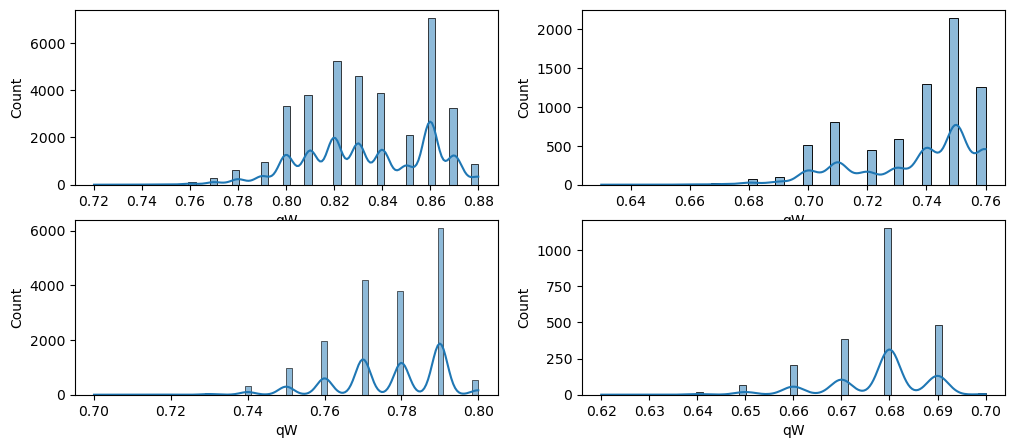

In [7]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.histplot(data=df_perth_49,x='qW',kde=True,ax=axs[0][0])
sns.histplot(data=df_perth_100,x='qW',kde=True,ax=axs[0][1])
sns.histplot(data=df_sydney_49,x='qW',kde=True,ax=axs[1][0])
sns.histplot(data=df_sydney_100,x='qW',kde=True,ax=axs[1][1])

<Axes: xlabel='qW'>

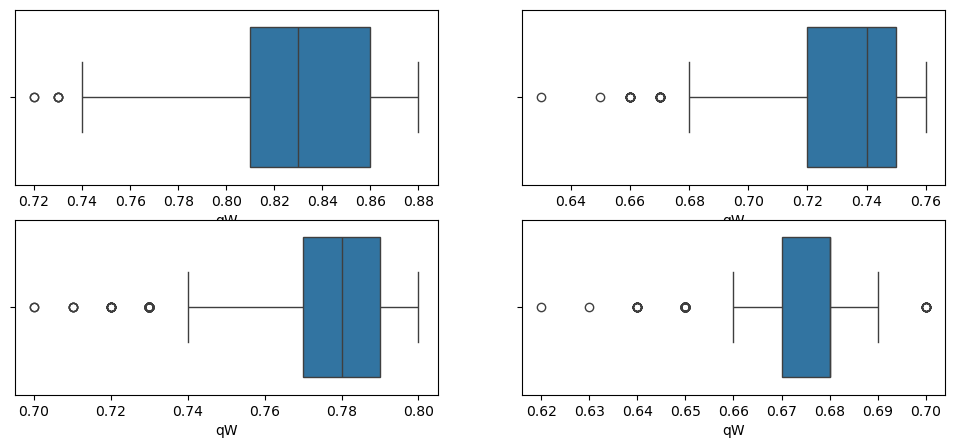

In [8]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.boxplot(data=df_perth_49,x='qW',ax=axs[0][0])
sns.boxplot(data=df_perth_100,x='qW',ax=axs[0][1])
sns.boxplot(data=df_sydney_49,x='qW',ax=axs[1][0])
sns.boxplot(data=df_sydney_100,x='qW',ax=axs[1][1])

<Axes: xlabel='Total_Power', ylabel='Count'>

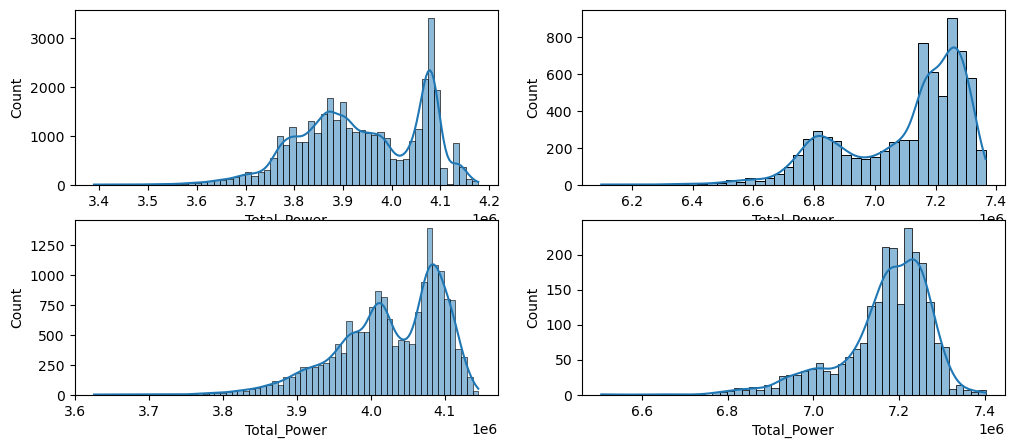

In [9]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.histplot(data=df_perth_49,x='Total_Power',kde=True,ax=axs[0][0])
sns.histplot(data=df_perth_100,x='Total_Power',kde=True,ax=axs[0][1])
sns.histplot(data=df_sydney_49,x='Total_Power',kde=True,ax=axs[1][0])
sns.histplot(data=df_sydney_100,x='Total_Power',kde=True,ax=axs[1][1])

<Axes: xlabel='Total_Power'>

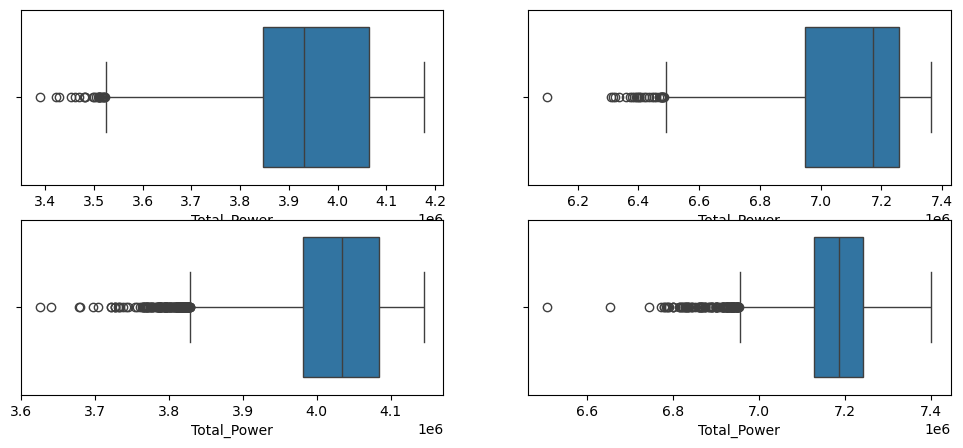

In [10]:
fig,axs = plt.subplots(2,2,figsize=(12,5))


sns.boxplot(data=df_perth_49,x='Total_Power',ax=axs[0][0])
sns.boxplot(data=df_perth_100,x='Total_Power',ax=axs[0][1])
sns.boxplot(data=df_sydney_49,x='Total_Power',ax=axs[1][0])
sns.boxplot(data=df_sydney_100,x='Total_Power',ax=axs[1][1])

## 1.2 Processing Data
- Extract Data 
- Align Columns: Add missing columns to smaller datasets.
- Add metadata: Include City and Generator_Size columns.

In [11]:
# dealing with Perth

# dealing with Perth_100
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100 via dictionary
missing_coordination_49 = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100
#missing_power = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# adding meta data with city and size via dictionary
adding_perth_meta_49 = {"City":"Perth","Generator_Size":49}

# Create DataFrame with the new columns
missing_perth_df_49 = pd.DataFrame(missing_coordination_49, index=df_perth_49.index)
adding_perth_df_49 = pd.DataFrame(adding_perth_meta_49, index=df_perth_49.index)

# extract last two columns
last_two_perth_49  = df_perth_49.iloc[:,-2:]
# Concatenate original DataFrame with missing columns
# axis = 1 means contact by columns
df_perth_49 = pd.concat([df_perth_49.iloc[:,:98],missing_perth_df_49,adding_perth_df_49,last_two_perth_49], axis=1)
df_perth_49_seen = df_perth_49.iloc[:32438]
df_perth_49_unseen = df_perth_49.iloc[32438:]




# dealing with Perth_100
# adding meta data with city and size via dictionary
adding_meta_data_100 = {"City":"Perth","Generator_Size":100}
adding_perth_df_100 = pd.DataFrame(adding_meta_data_100, index=df_perth_100.index)
# extract last two columns
last_two_perth_100  = df_perth_100.iloc[:,-2:]
df_perth_100 = pd.concat([df_perth_100.iloc[:,:200],adding_perth_df_100,last_two_perth_100], axis=1)
df_perth_100_seen = df_perth_100.iloc[:6549]
df_perth_100_unseen = df_perth_100.iloc[6549:]

df_perth_seen =  pd.concat([df_perth_49_seen,df_perth_100_seen],ignore_index=True)
df_perth_unseen =  pd.concat([df_perth_49_unseen,df_perth_100_unseen],ignore_index=True)

In [12]:
# dealing with Sydney

# dealing with Sydney_100
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100 via dictionary
missing_coordination_49 = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# Generate columns for the rest coordination X50, Y50, X51, Y51, ..., X100, Y100
#missing_power = {f"{coord}{i}": 0 for i in range(50, 101) for coord in ("X", "Y")}
# adding meta data with city and size via dictionary
adding_sydney_meta_49 = {"City":"Sydney","Generator_Size":49}

# Create DataFrame with the new columns
missing_sydney_df_49 = pd.DataFrame(missing_coordination_49, index=df_sydney_49.index)
adding_sydney_df_49 = pd.DataFrame(adding_sydney_meta_49, index=df_sydney_49.index)

# extract last two columns
last_two_sydney_49  = df_sydney_49.iloc[:,-2:]
# Concatenate original DataFrame with missing columns
# axis = 1 means contact by columns
df_sydney_49 = pd.concat([df_sydney_49.iloc[:,:98],missing_sydney_df_49,adding_sydney_df_49,last_two_sydney_49], axis=1)
df_sydney_49_seen = df_sydney_49.iloc[:16167]
df_sydney_49_unseen = df_sydney_49.iloc[16167:]


# dealing with Sydney_100
# adding meta data with city and size via dictionary
adding_sydney_meta_100 = {"City":"Sydney","Generator_Size":100}
adding_sydney_df_100 = pd.DataFrame(adding_sydney_meta_100, index=df_sydney_100.index)
# extract last two columns
last_two_sydney_100  = df_sydney_100.iloc[:,-2:]
df_sydney_100 = pd.concat([df_sydney_100.iloc[:,:200],adding_sydney_df_100,last_two_sydney_100], axis=1)
df_sydney_100_seen = df_sydney_100.iloc[:2086]
df_sydney_100_unseen = df_sydney_100.iloc[2086:]

df_sydney_seen =  pd.concat([df_sydney_49_seen,df_sydney_100_seen],ignore_index=True)
df_sydney_unseen =  pd.concat([df_sydney_49_unseen,df_sydney_100_unseen],ignore_index=True)

In [13]:
# dealing with Perth


df_perth_unseen_actual = df_perth_unseen.copy()
df_perth_unseen_to_be_predict = df_perth_unseen_actual.drop(columns=["qW","Total_Power"])


df_sydney_unseen_actual = df_sydney_unseen.copy()
df_sydney_unseen_to_be_predict = df_sydney_unseen_actual.drop(columns=["qW","Total_Power"])

In [14]:
df_perth_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.00,0.00,546.16,37.50,489.79,74.88,432.47,112.05,650.00,0.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,200.00,600.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,200.00,800.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.87,4102461.43
1,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.87,4103361.41
2,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,697.00,3.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0

In [15]:
df_perth_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.82,3857887.17
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.83,3929983.50
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0

In [16]:
df_perth_unseen_actual

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.82,3857887.17
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.83,3929983.50
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0

In [17]:
df_perth_unseen_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,

In [18]:
df_sydney_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,401.00,51.00,401.00,101.00,401.00,151.0,998.0,0.0,995.96,75.43,992.22,146.17,849.00,98.0,398.0,200.0,395.96,275.43,392.22,346.17,349.00,398.0,1000.0,200.0,995.96,275.43,1000.00,346.17,950.00,648.0,1.0,401.0,1.00,470.00,1.00,540.00,50.00,598.0,998.0,400.0,995.96,475.43,992.22,546.17,949.00,598.0,201.0,601.0,201.00,670.00,151.00,740.00,250.00,798.0,601.0,601.0,701.00,570.00,551.00,690.00,650.00,898.0,1.0,701.0,1.00,851.00,1.00,901.00,51.00,1000.0,398.0,800.0,395.96,875.43,392.22,946.17,349.00,998.0,798.0,800.0,795.96,875.43,792.22,946.17,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.78,4065416.61
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,795.82,77.69,793.70,150.00,749.00,198.0,998.0,0.0,995.82,77.69,993.70,150.00,949.00,198.0,198.0,200.0,195.82,277.69,193.70,350.00,149.00,398.0,998.0,200.0,995.82,277.69,993.70,350.00,949.00,398.0,798.0,400.0,795.82,477.69,793.70,550.00,749.00,598.0,998.0,400.0,995.82,477.69,993.70,550.00,949.00,598.0,598.0,600.0,595.82,677.69,593.70,750.00,549.00,798.0,998.0,600.0,995.82,677.69,993.70,750.00,949.00,798.0,198.0,800.0,195.82,877.69,193.70,950.00,149.00,998.0,798.0,800.0,795.82,877.69,793.70,950.00,749.00,998.0,998.0,800.0,995.82,877.69,993.70,950.00,949.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.76,3951216.37
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,397.46,75.19,392.94,150.00,287.64,198.0,798.0,0.0,797.46,75.19,792.94,150.00,687.64,198.0,198.0,200.0,197.46,275.19,192.94,350.00,87.64,398.0,998.0,200.0,997.46,275.19,992.94,350.00,887.64,398.0,398.0,400.0,397.46,475.19,392.94,550.00,287.64,598.0,998.0,400.0,997.46,475.19,992.94,550.00,887.64,598.0,198.0,600.0,197.46,675.19,192.94,750.00,87.64,798.0,798.0,600.0,797.46,675.19,792.94,750.00,687.64,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,598.0,800.0,597.46,875.19,592.94,950.00,487.64,998.0,998.0,800.0,997.46,875.19,992.94,950.00,887.64,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0

In [19]:
df_sydney_unseen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,201.00,70.00,201.00,140.00,250.00,198.0,601.0,1.0,601.00,51.00,601.00,101.00,601.00,151.0,998.0,0.0,996.79,73.55,997.18,147.45,949.00,198.0,601.0,201.0,601.00,251.00,601.00,301.00,601.00,351.0,1.0,401.0,1.00,451.00,1.00,501.00,1.00,551.0,998.0,400.0,996.79,473.55,997.18,547.45,949.00,598.0,1.0,601.0,1.00,651.00,1.00,701.00,1.00,751.0,801.0,601.0,801.00,670.00,801.00,740.00,850.00,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,398.0,800.0,396.79,873.55,397.18,947.45,349.00,998.0,998.0,800.0,996.79,873.55,997.18,947.45,949.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.79,4079797.83
1,398.0,0.0,397.46,75.65,393.60,144.02,349.00,198.0,798.0,0.0,797.46,75.65,793.60,144.02,749.00,198.0,398.0,200.0,397.46,275.65,393.60,344.02,349.00,398.0,798.0,200.0,797.46,275.65,793.60,344.02,749.00,398.0,398.0,400.0,397.46,475.65,393.60,544.02,349.00,598.0,798.0,400.0,797.46,475.65,793.60,544.02,749.00,598.0,998.0,400.0,997.46,475.65,993.60,544.02,949.00,598.0,198.0,600.0,197.46,675.65,193.60,744.02,149.00,798.0,398.0,600.0,397.46,675.65,393.60,744.02,349.00,798.0,998.0,600.0,997.46,675.65,993.60,744.02,949.00,798.0,198.0,800.0,197.46,875.65,193.60,944.02,149.00,998.0,398.0,800.0,397.46,875.65,393.60,944.02,349.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.75,3868987.32
2,398.0,0.0,397.60,72.40,393.28,146.64,349.00,198.0,598.0,0.0,597.60,72.40,593.28,146.64,549.00,198.0,798.0,0.0,797.60,72.40,793.28,146.64,749.00,198.0,798.0,200.0,797.60,272.40,793.28,346.64,749.00,398.0,998.0,200.0,997.60,272.40,993.28,346.64,949.00,398.0,798.0,400.0,797.60,472.40,793.28,546.64,749.00,598.0,998.0,400.0,997.60,472.40,993.28,546.64,949.00,598.0,998.0,600.0,997.60,672.40,993.28,746.64,949.00,798.0,198.0,800.0,197.60,872.40,193.28,946.64,149.00,998.0,398.0,800.0,397.60,872.40,393.28,946.64,349.00,998.0,598.0,800.0,597.60,872.40,593.28,946.64,549.00,998.0,798.0,800.0,797.60,872.40,793.28,946.64,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0

In [20]:
df_sydney_unseen_actual

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,201.00,70.00,201.00,140.00,250.00,198.0,601.0,1.0,601.00,51.00,601.00,101.00,601.00,151.0,998.0,0.0,996.79,73.55,997.18,147.45,949.00,198.0,601.0,201.0,601.00,251.00,601.00,301.00,601.00,351.0,1.0,401.0,1.00,451.00,1.00,501.00,1.00,551.0,998.0,400.0,996.79,473.55,997.18,547.45,949.00,598.0,1.0,601.0,1.00,651.00,1.00,701.00,1.00,751.0,801.0,601.0,801.00,670.00,801.00,740.00,850.00,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,398.0,800.0,396.79,873.55,397.18,947.45,349.00,998.0,998.0,800.0,996.79,873.55,997.18,947.45,949.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.79,4079797.83
1,398.0,0.0,397.46,75.65,393.60,144.02,349.00,198.0,798.0,0.0,797.46,75.65,793.60,144.02,749.00,198.0,398.0,200.0,397.46,275.65,393.60,344.02,349.00,398.0,798.0,200.0,797.46,275.65,793.60,344.02,749.00,398.0,398.0,400.0,397.46,475.65,393.60,544.02,349.00,598.0,798.0,400.0,797.46,475.65,793.60,544.02,749.00,598.0,998.0,400.0,997.46,475.65,993.60,544.02,949.00,598.0,198.0,600.0,197.46,675.65,193.60,744.02,149.00,798.0,398.0,600.0,397.46,675.65,393.60,744.02,349.00,798.0,998.0,600.0,997.46,675.65,993.60,744.02,949.00,798.0,198.0,800.0,197.46,875.65,193.60,944.02,149.00,998.0,398.0,800.0,397.46,875.65,393.60,944.02,349.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.75,3868987.32
2,398.0,0.0,397.60,72.40,393.28,146.64,349.00,198.0,598.0,0.0,597.60,72.40,593.28,146.64,549.00,198.0,798.0,0.0,797.60,72.40,793.28,146.64,749.00,198.0,798.0,200.0,797.60,272.40,793.28,346.64,749.00,398.0,998.0,200.0,997.60,272.40,993.28,346.64,949.00,398.0,798.0,400.0,797.60,472.40,793.28,546.64,749.00,598.0,998.0,400.0,997.60,472.40,993.28,546.64,949.00,598.0,998.0,600.0,997.60,672.40,993.28,746.64,949.00,798.0,198.0,800.0,197.60,872.40,193.28,946.64,149.00,998.0,398.0,800.0,397.60,872.40,393.28,946.64,349.00,998.0,598.0,800.0,597.60,872.40,593.28,946.64,549.00,998.0,798.0,800.0,797.60,872.40,793.28,946.64,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0

In [21]:
df_sydney_unseen_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,201.00,70.00,201.00,140.00,250.00,198.0,601.0,1.0,601.00,51.00,601.00,101.00,601.00,151.0,998.0,0.0,996.79,73.55,997.18,147.45,949.00,198.0,601.0,201.0,601.00,251.00,601.00,301.00,601.00,351.0,1.0,401.0,1.00,451.00,1.00,501.00,1.00,551.0,998.0,400.0,996.79,473.55,997.18,547.45,949.00,598.0,1.0,601.0,1.00,651.00,1.00,701.00,1.00,751.0,801.0,601.0,801.00,670.00,801.00,740.00,850.00,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,398.0,800.0,396.79,873.55,397.18,947.45,349.00,998.0,998.0,800.0,996.79,873.55,997.18,947.45,949.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49
1,398.0,0.0,397.46,75.65,393.60,144.02,349.00,198.0,798.0,0.0,797.46,75.65,793.60,144.02,749.00,198.0,398.0,200.0,397.46,275.65,393.60,344.02,349.00,398.0,798.0,200.0,797.46,275.65,793.60,344.02,749.00,398.0,398.0,400.0,397.46,475.65,393.60,544.02,349.00,598.0,798.0,400.0,797.46,475.65,793.60,544.02,749.00,598.0,998.0,400.0,997.46,475.65,993.60,544.02,949.00,598.0,198.0,600.0,197.46,675.65,193.60,744.02,149.00,798.0,398.0,600.0,397.46,675.65,393.60,744.02,349.00,798.0,998.0,600.0,997.46,675.65,993.60,744.02,949.00,798.0,198.0,800.0,197.46,875.65,193.60,944.02,149.00,998.0,398.0,800.0,397.46,875.65,393.60,944.02,349.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49
2,398.0,0.0,397.60,72.40,393.28,146.64,349.00,198.0,598.0,0.0,597.60,72.40,593.28,146.64,549.00,198.0,798.0,0.0,797.60,72.40,793.28,146.64,749.00,198.0,798.0,200.0,797.60,272.40,793.28,346.64,749.00,398.0,998.0,200.0,997.60,272.40,993.28,346.64,949.00,398.0,798.0,400.0,797.60,472.40,793.28,546.64,749.00,598.0,998.0,400.0,997.60,472.40,993.28,546.64,949.00,598.0,998.0,600.0,997.60,672.40,993.28,746.64,949.00,798.0,198.0,800.0,197.60,872.40,193.28,946.64,149.00,998.0,398.0,800.0,397.60,872.40,393.28,946.64,349.00,998.0,598.0,800.0,597.60,872.40,593.28,946.64,549.00,998.0,798.0,800.0,797.60,872.40,793.28,946.64,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0

## 1.3 Merge data

# 2. Supervised Machine Learning

## 2.1 train_test_split

In [144]:
df_perth_seen

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,600.00,0.00,546.16,37.50,489.79,74.88,432.47,112.05,650.00,0.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,200.00,600.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,200.00,800.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.87,4102461.43
1,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.87,4103361.41
2,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,697.00,3.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0

In [22]:
from sklearn.model_selection import train_test_split

# Prepare data for Perth
X_perth = df_perth_seen.drop(columns=["qW","Total_Power"])
y_perth_qW = df_perth_seen["qW"]
y_perth_Total_Power = df_perth_seen["Total_Power"]

X_perth_qW_train,X_perth_qW_test,y_perth_qW_train,y_perth_qW_test = train_test_split(X_perth,y_perth_qW,test_size=0.2,random_state=43)
X_perth_Total_Power_train,X_perth_Total_Power_test,y_perth_Total_Power_train,y_perth_Total_Power_test = train_test_split(X_perth,y_perth_Total_Power,test_size=0.2,random_state=43)

In [23]:
# Prepare data for Sydney
X_sydney = df_sydney_seen.drop(columns=["qW","Total_Power"])
y_sydney_qW = df_sydney_seen["qW"]
y_sydney_Total_Power = df_sydney_seen["Total_Power"]

X_sydney_qW_train,X_sydney_qW_test,y_sydney_qW_train,y_sydney_qW_test = train_test_split(X_sydney,y_sydney_qW,test_size=0.2,random_state=43)
X_sydney_Total_Power_train,X_sydney_Total_Power_test,y_sydney_Total_Power_train,y_sydney_Total_Power_test = train_test_split(X_sydney,y_sydney_Total_Power,test_size=0.2,random_state=43)

In [24]:
X_perth

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,600.00,0.00,546.16,37.50,489.79,74.88,432.47,112.05,650.00,0.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,200.00,600.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,200.00,800.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
1,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,700.00,0.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
2,593.00,12.00,546.16,37.50,489.79,74.88,432.47,112.05,644.00,8.0,697.00,3.00,750.00,0.00,800.00,0.00,850.00,0.00,900.00,0.00,950.00,0.00,1000.00,0.00,1000.00,200.00,946.16,237.50,889.79,274.88,832.47,312.05,200.00,400.00,146.16,437.50,89.79,474.88,0.00,612.05,400.00,400.00,346.16,437.50,289.79,474.88,232.47,512.05,600.00,400.00,546.16,437.50,489.79,474.88,432.47,512.05,800.00,400.00,746.16,437.50,689.79,474.88,632.47,512.05,197.00,559.0,146.16,637.50,89.79,674.88,0.00,762.05,600.00,600.0,546.16,637.50,489.79,674.88,432.47,712.05,204.00,807.00,146.16,837.50,89.79,874.88,32.47,912.05,400.00,800.00,346.16,837.50,289.79,874.88,232.47,912.05,0.00,1010.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0

In [25]:
X_sydney

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,1.0,1.0,0.00,70.00,1.00,140.00,50.00,198.0,401.0,1.0,401.00,51.00,401.00,101.00,401.00,151.0,998.0,0.0,995.96,75.43,992.22,146.17,849.00,98.0,398.0,200.0,395.96,275.43,392.22,346.17,349.00,398.0,1000.0,200.0,995.96,275.43,1000.00,346.17,950.00,648.0,1.0,401.0,1.00,470.00,1.00,540.00,50.00,598.0,998.0,400.0,995.96,475.43,992.22,546.17,949.00,598.0,201.0,601.0,201.00,670.00,151.00,740.00,250.00,798.0,601.0,601.0,701.00,570.00,551.00,690.00,650.00,898.0,1.0,701.0,1.00,851.00,1.00,901.00,51.00,1000.0,398.0,800.0,395.96,875.43,392.22,946.17,349.00,998.0,798.0,800.0,795.96,875.43,792.22,946.17,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49
1,598.0,0.0,595.82,77.69,593.70,150.00,549.00,198.0,798.0,0.0,795.82,77.69,793.70,150.00,749.00,198.0,998.0,0.0,995.82,77.69,993.70,150.00,949.00,198.0,198.0,200.0,195.82,277.69,193.70,350.00,149.00,398.0,998.0,200.0,995.82,277.69,993.70,350.00,949.00,398.0,798.0,400.0,795.82,477.69,793.70,550.00,749.00,598.0,998.0,400.0,995.82,477.69,993.70,550.00,949.00,598.0,598.0,600.0,595.82,677.69,593.70,750.00,549.00,798.0,998.0,600.0,995.82,677.69,993.70,750.00,949.00,798.0,198.0,800.0,195.82,877.69,193.70,950.00,149.00,998.0,798.0,800.0,795.82,877.69,793.70,950.00,749.00,998.0,998.0,800.0,995.82,877.69,993.70,950.00,949.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49
2,198.0,0.0,197.46,75.19,192.94,150.00,87.64,198.0,398.0,0.0,397.46,75.19,392.94,150.00,287.64,198.0,798.0,0.0,797.46,75.19,792.94,150.00,687.64,198.0,198.0,200.0,197.46,275.19,192.94,350.00,87.64,398.0,998.0,200.0,997.46,275.19,992.94,350.00,887.64,398.0,398.0,400.0,397.46,475.19,392.94,550.00,287.64,598.0,998.0,400.0,997.46,475.19,992.94,550.00,887.64,598.0,198.0,600.0,197.46,675.19,192.94,750.00,87.64,798.0,798.0,600.0,797.46,675.19,792.94,750.00,687.64,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,598.0,800.0,597.46,875.19,592.94,950.00,487.64,998.0,998.0,800.0,997.46,875.19,992.94,950.00,887.64,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,

In [26]:
y_perth_qW

0        0.87
1        0.87
2        0.87
3        0.87
4        0.79
         ... 
38982    0.74
38983    0.69
38984    0.75
38985    0.72
38986    0.74
Name: qW, Length: 38987, dtype: float64

In [27]:
y_perth_Total_Power

0        4102461.43
1        4103361.41
2        4103680.44
3        4105661.06
4        3752648.77
            ...    
38982    7160446.23
38983    6683962.63
38984    7241290.68
38985    6891529.42
38986    7168256.20
Name: Total_Power, Length: 38987, dtype: float64

In [28]:
y_sydney_qW

0        0.78
1        0.76
2        0.78
3        0.75
4        0.77
         ... 
18248    0.68
18249    0.69
18250    0.66
18251    0.65
18252    0.69
Name: qW, Length: 18253, dtype: float64

In [29]:
y_sydney_Total_Power

0        4065416.61
1        3951216.37
2        4022640.78
3        3879223.41
4        3974691.24
            ...    
18248    7232202.53
18249    7262821.25
18250    7014410.84
18251    6919736.83
18252    7303589.25
Name: Total_Power, Length: 18253, dtype: float64

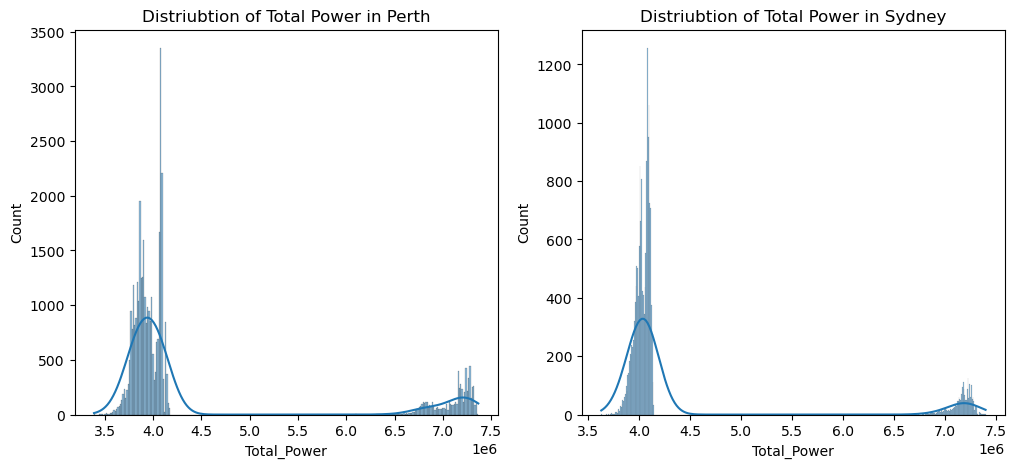

In [30]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

sns.histplot(x=y_perth_Total_Power,kde=True,ax=axs[0])
axs[0].set_title("Distriubtion of Total Power in Perth")


sns.histplot(x=y_sydney_Total_Power,kde=True,ax=axs[1])
axs[1].set_title("Distriubtion of Total Power in Sydney")


plt.show()

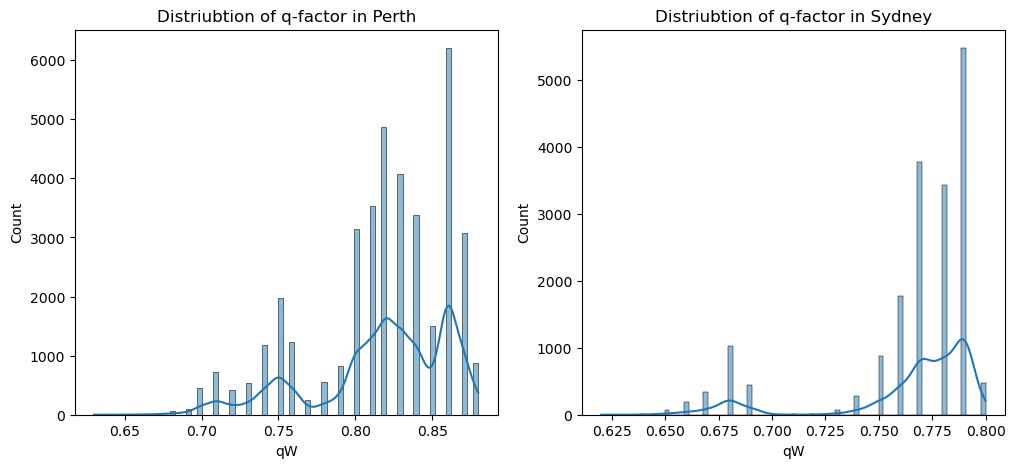

In [31]:
fig,axs = plt.subplots(1,2,figsize=(12,5))

sns.histplot(x=y_perth_qW,kde=True,ax=axs[0])
axs[0].set_title("Distriubtion of q-factor in Perth")


sns.histplot(x=y_sydney_qW,kde=True,ax=axs[1])
axs[1].set_title("Distriubtion of q-factor in Sydney")


plt.show()

## 2.2 Processing pipeline

- numerical features: coordination (X1,Y1,...X100,Y100) → scaled;
- numercial feature: "Generator_Size" → not scaled;
- categorical feature: "City" → OneHotEncoder;

In [146]:
X_perth.select_dtypes("object")

,City
0,Perth
1,Perth
2,Perth
3,Perth
4,Perth
...,...
38982,Perth
38983,Perth
38984,Perth
38985,Perth


In [145]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Get list of columns 
num_cols = X_perth.select_dtypes("number").columns.tolist()
# Keep this column in the unscaled list
unscaled_cols = ["Generator_Size"]
# Exclude "Generator_Size" from num_cols
num_cols.remove("Generator_Size")
cat_cols = X_perth.select_dtypes("object").columns

print(cat_cols)

# Define transformers for different column types
num_transformer = "passthrough"
# use "passthrough" to indicate that this column should not undergo any transformation and should be passed through to the next step unchanged.
unscaled_transformer = "passthrough"
cat_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))


preprocessor_perth = make_column_transformer(
    (num_transformer,num_cols),   # Scale numeric columns (excluding Generator_Size)
    (unscaled_transformer,unscaled_cols),   # Pass through unscaled columns (Generator_Size)
    (cat_transformer,cat_cols)   # One-hot encode categorical columns
    
)

preprocessor_perth

Index(['City'], dtype='object')


ColumnTransformer(transformers=[('passthrough-1', 'passthrough',
                                 ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4',
                                  'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7',
                                  'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11',
                                  'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14',
                                  'Y14', 'X15', 'Y15', ...]),
                                ('passthrough-2', 'passthrough',
                                 ['Generator_Size']),
                                ('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 Index(['City'], dtype='object'))])

In [33]:
# Get list of columns 
num_cols = X_sydney.select_dtypes("number").columns.tolist()
# Keep this column in the unscaled list
unscaled_cols = ["Generator_Size"]
# Exclude "Generator_Size" from num_cols
num_cols.remove("Generator_Size")
cat_cols = X_sydney.select_dtypes("object").columns

# Define transformers for different column types
num_transformer = "passthrough"
# use "passthrough" to indicate that this column should not undergo any transformation and should be passed through to the next step unchanged.
unscaled_transformer = "passthrough"
cat_transformer = make_pipeline(OneHotEncoder(drop="if_binary"))


preprocessor_sydney = make_column_transformer(
    (num_transformer,num_cols),   # Scale numeric columns (excluding Generator_Size)
    (unscaled_transformer,unscaled_cols),   # Pass through unscaled columns (Generator_Size)
    (cat_transformer,cat_cols)   # One-hot encode categorical columns
    
)

preprocessor_sydney

ColumnTransformer(transformers=[('passthrough-1', 'passthrough',
                                 ['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4',
                                  'Y4', 'X5', 'Y5', 'X6', 'Y6', 'X7', 'Y7',
                                  'X8', 'Y8', 'X9', 'Y9', 'X10', 'Y10', 'X11',
                                  'Y11', 'X12', 'Y12', 'X13', 'Y13', 'X14',
                                  'Y14', 'X15', 'Y15', ...]),
                                ('passthrough-2', 'passthrough',
                                 ['Generator_Size']),
                                ('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 Index(['City'], dtype='object'))])

# Model Selection

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV



regressors = [
    DecisionTreeRegressor(),
    Ridge(),
    SVR(),
    RandomForestRegressor(n_estimators=10)
]

# serach best models in Total_Power
for reg in regressors:
    pipe_perth_Total_Power = make_pipeline(preprocessor_perth,reg)
    grid_perth_Total_Power = GridSearchCV(estimator=pipe_perth_Total_Power,param_grid={},cv=5,scoring="neg_mean_absolute_error")
    grid_perth_Total_Power.fit(X_perth_Total_Power_train,y_perth_Total_Power_train)
    print(f"For Total_Power in Perth: the Best Cross Validation Score for {reg}: {grid_perth_Total_Power.best_score_}")

print("-------------------------------------------------------------------------------------------------------------------")

# serach best models in q
for reg in regressors:
    pipe_perth_qW = make_pipeline(preprocessor_perth,reg)
    grid_perth_qW = GridSearchCV(estimator=pipe_perth_qW,param_grid={},cv=5,scoring="neg_mean_absolute_error")
    grid_perth_qW.fit(X_perth_qW_train,y_perth_qW_train)
    print(f"For qW  in Perth: the Best Cross Validation Score for {reg}: {grid_perth_qW.best_score_}")

For Total_Power in Perth: the Best Cross Validation Score for DecisionTreeRegressor(): -15177.876422011595
For Total_Power in Perth: the Best Cross Validation Score for Ridge(): -42358.876886806596


In [ ]:
# serach best models in Total_Power
for reg in regressors:
    pipe_sydney_Total_Power = make_pipeline(preprocessor_sydney,reg)
    grid_sydney_Total_Power = GridSearchCV(estimator=pipe_sydney_Total_Power,param_grid={},cv=5,scoring="neg_mean_absolute_error")
    grid_sydney_Total_Power.fit(X_sydney_Total_Power_train,y_sydney_Total_Power_train)
    print(f"For Total_Power in Sydney: the Best Cross Validation Score for {reg}: {grid_sydney_Total_Power.best_score_}")

print("-------------------------------------------------------------------------------------------------------------------")

# serach best models in q
for reg in regressors:
    pipe_sydney_qW = make_pipeline(preprocessor_sydney,reg)
    grid_sydney_qW = GridSearchCV(estimator=pipe_sydney_qW,param_grid={},cv=5,scoring="neg_mean_absolute_error")
    grid_sydney_qW.fit(X_sydney_qW_train,y_sydney_qW_train)
    print(f"For qW in Sydney: the Best Cross Validation Score for {reg}: {grid_sydney_qW.best_score_}")

## 2.3 Hyperparameter tuning for best trained model

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# perth 
model_perth_qw = DecisionTreeRegressor()

# Define parameter grid for DecisionTreeRegressor
# accessing parameters of the base estimator in a MultiOutputRegressor
param_grid_dtr = {
    "decisiontreeregressor__max_depth": [10, 50, None],
    "decisiontreeregressor__min_samples_split":  [2, 10, 50, 100],
    "decisiontreeregressor__min_samples_leaf":  [1, 2, 5, 10]  
}


model_perth_Total_Power = DecisionTreeRegressor()
# Create pipeline with scaling
pipe_perth_Total_Power = make_pipeline(preprocessor_perth,model_perth_Total_Power)
# Use cross validation fold to search the best validation score and hyperparameter setting
grid_perth_Total_Power = GridSearchCV(pipe_perth_Total_Power,cv=5,param_grid=param_grid_dtr,scoring="neg_mean_absolute_error",n_jobs=-1, verbose=1)
grid_perth_Total_Power.fit(X_perth_Total_Power_train,y_perth_Total_Power_train)
# Display best validation score and hyperparameters
print(f"For Total_Power in Perth: Best Validation Score: {grid_perth_Total_Power.best_score_}")
print(f"With hpyerparameter setting: {grid_perth_Total_Power.best_params_}")
perth_best_train_model_Total_Power = grid_perth_Total_Power.best_estimator_



# Create pipeline with scaling
pipe_perth_qW = make_pipeline(preprocessor_perth,model_perth_qw)
# Use cross validation fold to search the best validation score and hyperparameter setting
grid_perth_qW = GridSearchCV(pipe_perth_qW,cv=5,param_grid=param_grid_dtr,scoring="neg_mean_absolute_error",n_jobs=-1, verbose=1)
grid_perth_qW.fit(X_perth_qW_train,y_perth_qW_train)
# Display best validation score and hyperparameters
print(f"For qW in Perth: Best Validation Score: {grid_perth_qW.best_score_}")
print(f"With hpyerparameter setting: {grid_perth_qW.best_params_}")
perth_best_train_model_qW = grid_perth_qW.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
For Total_Power in perth: Best Validation Score: -15023.485891972963
With hpyerparameter setting: {'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
For qW in perth: Best Validation Score: -0.002551461694511131
With hpyerparameter setting: {'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}


In [37]:

# Sydney 
model_sydney_qw = DecisionTreeRegressor()

# Define parameter grid for DecisionTreeRegressor
# accessing parameters of the base estimator in a MultiOutputRegressor
param_grid_dtr = {
    "decisiontreeregressor__max_depth": [10, 50, None],
    "decisiontreeregressor__min_samples_split":  [2, 10, 50, 100],
    "decisiontreeregressor__min_samples_leaf":  [1, 2, 5, 10]  
}


model_sydney_Total_Power = DecisionTreeRegressor()
# Create pipeline with scaling
pipe_sydney_Total_Power = make_pipeline(preprocessor_sydney,model_sydney_Total_Power)
# Use cross validation fold to search the best validation score and hyperparameter setting
grid_sydney_Total_Power = GridSearchCV(pipe_sydney_Total_Power,cv=5,param_grid=param_grid_dtr,scoring="neg_mean_absolute_error",n_jobs=-1, verbose=1)
grid_sydney_Total_Power.fit(X_sydney_Total_Power_train,y_sydney_Total_Power_train)
# Display best validation score and hyperparameters
print(f"For Total_Power in Sydney: Best Validation Score: {grid_sydney_Total_Power.best_score_}")
print(f"With hpyerparameter setting: {grid_sydney_Total_Power.best_params_}")
sydney_best_train_model_Total_Power = grid_sydney_Total_Power.best_estimator_




# Create pipeline with scaling
pipe_sydney_qW = make_pipeline(preprocessor_sydney,model_sydney_qw)
# Use cross validation fold to search the best validation score and hyperparameter setting
grid_sydney_qW = GridSearchCV(pipe_sydney_qW,cv=5,param_grid=param_grid_dtr,scoring="neg_mean_absolute_error",n_jobs=-1, verbose=1)
grid_sydney_qW.fit(X_sydney_qW_train,y_sydney_qW_train)
# Display best validation score and hyperparameters
print(f"For qW in Sydney: Best Validation Score: {grid_sydney_qW.best_score_}")
print(f"With hpyerparameter setting: {grid_sydney_qW.best_params_}")
sydney_best_train_model_qW = grid_sydney_qW.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
For Total_Power in Sydney: Best Validation Score: -6822.786691709312
With hpyerparameter setting: {'decisiontreeregressor__max_depth': None, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
For qW in Sydney: Best Validation Score: -0.0010697122396643578
With hpyerparameter setting: {'decisiontreeregressor__max_depth': 50, 'decisiontreeregressor__min_samples_leaf': 1, 'decisiontreeregressor__min_samples_split': 2}


# 2.4 Scoring on the trained data

In [32]:
y_qW_train

46122    0.79
14962    0.83
11471    0.83
23129    0.86
44633    0.75
         ... 
18448    0.82
40753    0.77
51455    0.77
19776    0.80
14148    0.82
Name: qW, Length: 45792, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

# City in Perth

y_perth_Total_Power_train_predict = perth_best_train_model_Total_Power.predict(X_perth_Total_Power_train)
# metric for Total_Power
Total_Power_perth_mse_train = mean_squared_error(y_perth_Total_Power_train,y_perth_Total_Power_train_predict)
Total_Power_perth_mae_train = mean_absolute_error(y_perth_Total_Power_train,y_perth_Total_Power_train_predict)
Total_Power_perth_mae_pct_train = mean_absolute_percentage_error(y_perth_Total_Power_train,y_perth_Total_Power_train_predict)
Total_Power_perth_r2_train = r2_score(y_perth_Total_Power_train,y_perth_Total_Power_train_predict)



y_perth_qW_train_predict = perth_best_train_model_qW.predict(X_perth_qW_train)
# metric for qW
qW_perth_mse_train = mean_squared_error(y_perth_qW_train,y_perth_qW_train_predict)
qW_perth_mae_train = mean_absolute_error(y_perth_qW_train,y_perth_qW_train_predict)
qW_perth_mae_pct_train = mean_absolute_percentage_error(y_perth_qW_train,y_perth_qW_train_predict)
qW_perth_r2_train = r2_score(y_perth_qW_train,y_perth_qW_train_predict)


print("The Score of Training Data in Perth:")

print(f"Total_Power MSE Score: {Total_Power_perth_mse_train}")
print(f"Total_Power MAE Score: {Total_Power_perth_mae_train}")
print(f"Total_Power MAE PCT Score: {Total_Power_perth_mae_pct_train*100}%")
print(f"Total_Power R_2 Score: {Total_Power_perth_r2_train}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_perth_mse_train}")
print(f"qW MAE Score: {qW_perth_mae_train}")
print(f"qW MAE PCT Score: {qW_perth_mae_pct_train*100}%")
print(f"qW R_2 Score: {qW_perth_r2_train}")

The Score of Training Data in Perth:
Total_Power MSE Score: 108143474.58907735
Total_Power MAE Score: 1586.9936836873292
Total_Power MAE PCT Score: 0.0004135940730594074
Total_Power R_2 Score: 0.9999238857363001
------------------------------------------------
qW MSE Score: 5.1059017836003015e-06
qW MAE Score: 0.00034598384058703846
qW MAE PCT Score: 0.0004261657499294021
qW R_2 Score: 0.9973876291764294


In [42]:
# City in Sydney

y_sydney_Total_Power_train_predict = sydney_best_train_model_Total_Power.predict(X_sydney_Total_Power_train)
# metric for Total_Power
Total_Power_sydney_mse_train = mean_squared_error(y_sydney_Total_Power_train,y_sydney_Total_Power_train_predict)
Total_Power_sydney_mae_train = mean_absolute_error(y_sydney_Total_Power_train,y_sydney_Total_Power_train_predict)
Total_Power_sydney_mae_pct_train = mean_absolute_percentage_error(y_sydney_Total_Power_train,y_sydney_Total_Power_train_predict)
Total_Power_sydney_r2_train = r2_score(y_sydney_Total_Power_train,y_sydney_Total_Power_train_predict)



y_sydney_qW_train_predict = sydney_best_train_model_qW.predict(X_sydney_qW_train)
# metric for qW
qW_sydney_mse_train = mean_squared_error(y_sydney_qW_train,y_sydney_qW_train_predict)
qW_sydney_mae_train = mean_absolute_error(y_sydney_qW_train,y_sydney_qW_train_predict)
qW_sydney_mae_pct_train = mean_absolute_percentage_error(y_sydney_qW_train,y_sydney_qW_train_predict)
qW_sydney_r2_train = r2_score(y_sydney_qW_train,y_sydney_qW_train_predict)


print("The Score of Training Data in sydney:")

print(f"Total_Power MSE Score: {Total_Power_sydney_mse_train}")
print(f"Total_Power MAE Score: {Total_Power_sydney_mae_train}")
print(f"Total_Power MAE PCT Score: {Total_Power_sydney_mae_pct_train*100}%")
print(f"Total_Power R_2 Score: {Total_Power_sydney_r2_train}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_sydney_mse_train}")
print(f"qW MAE Score: {qW_sydney_mae_train}")
print(f"qW MAE PCT Score: {qW_sydney_mae_pct_train*100}%")
print(f"qW R_2 Score: {qW_sydney_r2_train}")

The Score of Training Data in sydney:
Total_Power MSE Score: 2.013422819863718e-05
Total_Power MAE Score: 0.00011505341209489594
Total_Power MAE PCT Score: 2.7935923253713508e-11
Total_Power R_2 Score: 1.0
------------------------------------------------
qW MSE Score: 9.475069271871392e-30
qW MAE Score: 1.7620931878854114e-15
qW MAE PCT Score: 2.2748711795465375e-15
qW R_2 Score: 1.0


# 2.5 Scoring on the test data

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score


y_perth_Total_Power_test_predict = perth_best_train_model_Total_Power.predict(X_perth_Total_Power_test)
# metric for Total_Power
Total_Power_perth_mse_test = mean_squared_error(y_perth_Total_Power_test,y_perth_Total_Power_test_predict)
Total_Power_perth_mae_test = mean_absolute_error(y_perth_Total_Power_test,y_perth_Total_Power_test_predict)
Total_Power_perth_mae_pct_test = mean_absolute_percentage_error(y_perth_Total_Power_test,y_perth_Total_Power_test_predict)
Total_Power_perth_r2_test = r2_score(y_perth_Total_Power_test,y_perth_Total_Power_test_predict)



y_perth_qW_test_predict = perth_best_train_model_qW.predict(X_perth_qW_test)
# metric for qW
qW_perth_mse_test = mean_squared_error(y_perth_qW_test,y_perth_qW_test_predict)
qW_perth_mae_test = mean_absolute_error(y_perth_qW_test,y_perth_qW_test_predict)
qW_perth_mae_pct_test = mean_absolute_percentage_error(y_perth_qW_test,y_perth_qW_test_predict)
qW_perth_r2_test = r2_score(y_perth_qW_test,y_perth_qW_test_predict)


print("The Score of testing Data in Perth:")

print(f"Total_Power MSE Score: {Total_Power_perth_mse_test}")
print(f"Total_Power MAE Score: {Total_Power_perth_mae_test}")
print(f"Total_Power MAE PCT Score: {Total_Power_perth_mae_pct_test*100}%")
print(f"Total_Power R_2 Score: {Total_Power_perth_r2_test}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_perth_mse_test}")
print(f"qW MAE Score: {qW_perth_mae_test}")
print(f"qW MAE PCT Score: {qW_perth_mae_pct_test*100}%")
print(f"qW R_2 Score: {qW_perth_r2_test}")

The Score of testing Data in Perth:
Total_Power MSE Score: 2535729336.7810736
Total_Power MAE Score: 14540.446697571668
Total_Power MAE PCT Score: 0.0030745366440123978
Total_Power R_2 Score: 0.998202750199514
------------------------------------------------
qW MSE Score: 6.894031349792943e-05
qW MAE Score: 0.0025229785929796462
qW MAE PCT Score: 0.0032126252232237695
qW R_2 Score: 0.9650503631960584


In [49]:
y_sydney_Total_Power_test_predict = sydney_best_train_model_Total_Power.predict(X_sydney_Total_Power_test)
# metric for Total_Power
Total_Power_sydney_mse_test = mean_squared_error(y_sydney_Total_Power_test,y_sydney_Total_Power_test_predict)
Total_Power_sydney_mae_test = mean_absolute_error(y_sydney_Total_Power_test,y_sydney_Total_Power_test_predict)
Total_Power_sydney_mae_pct_test = mean_absolute_percentage_error(y_sydney_Total_Power_test,y_sydney_Total_Power_test_predict)
Total_Power_sydney_r2_test = r2_score(y_sydney_Total_Power_test,y_sydney_Total_Power_test_predict)



y_sydney_qW_test_predict = sydney_best_train_model_qW.predict(X_sydney_qW_test)
# metric for qW
qW_sydney_mse_test = mean_squared_error(y_sydney_qW_test,y_sydney_qW_test_predict)
qW_sydney_mae_test = mean_absolute_error(y_sydney_qW_test,y_sydney_qW_test_predict)
qW_sydney_mae_pct_test = mean_absolute_percentage_error(y_sydney_qW_test,y_sydney_qW_test_predict)
qW_sydney_r2_test = r2_score(y_sydney_qW_test,y_sydney_qW_test_predict)


print("The Score of testing Data in Sydney:")

print(f"Total_Power MSE Score: {Total_Power_sydney_mse_test}")
print(f"Total_Power MAE Score: {Total_Power_sydney_mae_test}")
print(f"Total_Power MAE PCT Score: {Total_Power_sydney_mae_pct_test*100}%")
print(f"Total_Power R_2 Score: {Total_Power_sydney_r2_test}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_sydney_mse_test}")
print(f"qW MAE Score: {qW_sydney_mae_test}")
print(f"qW MAE PCT Score: {qW_sydney_mae_pct_test*100}%")
print(f"qW R_2 Score: {qW_sydney_r2_test}")

The Score of testing Data in Sydney:
Total_Power MSE Score: 437010304.5165966
Total_Power MAE Score: 5621.547808820119
Total_Power MAE PCT Score: 0.0011770373849016558
Total_Power R_2 Score: 0.9995676661707091
------------------------------------------------
qW MSE Score: 1.207888249794581e-05
qW MAE Score: 0.0008518214187910804
qW MAE PCT Score: 0.0011621098812532942
qW R_2 Score: 0.989760620917485


## 2.6 Refit best tested model on full data (two cities with two) 

In [48]:
# City in Perth

y_perth_Total_Power_pred = perth_best_train_model_Total_Power.predict(X_perth)
mse_perth_Total_Power = mean_squared_error(y_perth_Total_Power,y_perth_Total_Power_pred)
mae_perth_Total_Power = mean_absolute_error(y_perth_Total_Power,y_perth_Total_Power_pred)
mae_perth_pct_Total_Power = mean_absolute_percentage_error(y_perth_Total_Power,y_perth_Total_Power_pred)
r2_perth_Total_Power = r2_score(y_perth_Total_Power,y_perth_Total_Power_pred)


print("The Score of Testing Data on Total_Power in Perth:")
print(f"MSE Score: {mse_perth_Total_Power}")
print(f"MAE Score: {mae_perth_Total_Power}")
print(f"MAE PCT Score: {mae_perth_pct_Total_Power*100}%")
print(f"R_2 Score: {r2_perth_Total_Power}")

print("----------------------------------------------")

y_perth_qW_pred = perth_best_train_model_qW.predict(X_perth)
mse_perth_qW = mean_squared_error(y_perth_qW,y_perth_qW_pred)
mae_perth_qW = mean_absolute_error(y_perth_qW,y_perth_qW_pred)
mae_perth_pct_qW = mean_absolute_percentage_error(y_perth_qW,y_perth_qW_pred)
r2_perth_qW = r2_score(y_perth_qW,y_perth_qW_pred)


print("The Score of Testing Data on qW in Perth:")
print(f"MSE Score: {mse_perth_qW}")
print(f"MAE Score: {mae_perth_qW}")
print(f"MAE PCT Score: {mae_perth_pct_qW*100}%")
print(f"R_2 Score: {r2_perth_qW}")

The Score of Testing Data on Total_Power in Perth:
MSE Score: 593698006.9555889
MAE Score: 4177.883636806832
MAE PCT Score: 0.0009458235384784296
R_2 Score: 0.9995815557254184
----------------------------------------------
The Score of Testing Data on qW in Perth:
MSE Score: 1.7873766521803763e-05
MAE Score: 0.0007814162944603183
MAE PCT Score: 0.0009835005274898576
R_2 Score: 0.9908720178725177


In [51]:
y_sydney_Total_Power_pred = sydney_best_train_model_Total_Power.predict(X_sydney)
mse_sydney_Total_Power = mean_squared_error(y_sydney_Total_Power,y_sydney_Total_Power_pred)
mae_sydney_Total_Power = mean_absolute_error(y_sydney_Total_Power,y_sydney_Total_Power_pred)
mae_sydney_pct_Total_Power = mean_absolute_percentage_error(y_sydney_Total_Power,y_sydney_Total_Power_pred)
r2_sydney_Total_Power = r2_score(y_sydney_Total_Power,y_sydney_Total_Power_pred)


print("The Score of Testing Data on Total_Power in sydney:")
print(f"MSE Score: {mse_sydney_Total_Power}")
print(f"MAE Score: {mae_sydney_Total_Power}")
print(f"MAE PCT Score: {mae_sydney_pct_Total_Power}")
print(f"R_2 Score: {r2_sydney_Total_Power}")

print("----------------------------------------------")

y_sydney_qW_pred = sydney_best_train_model_qW.predict(X_sydney)
mse_sydney_qW = mean_squared_error(y_sydney_qW,y_sydney_qW_pred)
mae_sydney_qW = mean_absolute_error(y_sydney_qW,y_sydney_qW_pred)
mae_sydney_pct_qW = mean_absolute_percentage_error(y_sydney_qW,y_sydney_qW_pred)
r2_sydney_qW = r2_score(y_sydney_qW,y_sydney_qW_pred)


print("The Score of Testing Data on qW in sydney:")
print(f"MSE Score: {mse_sydney_qW}")
print(f"MAE Score: {mae_sydney_qW}")
print(f"MAE PCT Score: {mae_sydney_pct_qW}")
print(f"R_2 Score: {r2_sydney_qW}")

The Score of Testing Data on Total_Power in sydney:
MSE Score: 87411637.63712204
MAE Score: 1124.4328455603013
MAE PCT Score: 0.0002354332931680434
R_2 Score: 0.9999129528638845
----------------------------------------------
The Score of Testing Data on qW in sydney:
MSE Score: 2.4160411987070705e-06
MAE Score: 0.00017038295074957345
MAE PCT Score: 0.0002324474429676763
R_2 Score: 0.9979555279666722


## 2.7 Save Best Trained Model to Hard Drive

In [52]:
from joblib import dump


dump(perth_best_train_model_Total_Power,"perth_best_train_model_Total_Power.joblib")
dump(perth_best_train_model_qW,"perth_best_train_model_qW.joblib")


dump(sydney_best_train_model_Total_Power,"sydney_best_train_model_Total_Power.joblib")
dump(sydney_best_train_model_qW,"sydney_best_train_model_qW.joblib")

['sydney_best_train_model_qW.joblib']

# 3. Predict on Unseen Data

In [53]:
df_perth_unseen_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,

In [56]:
# Predict in Perth
df_perth_unseen_prediction = df_perth_unseen_to_be_predict.copy()
df_perth_unseen_prediction["qW_Predicted"] = perth_best_train_model_qW.predict(df_perth_unseen_to_be_predict)
df_perth_unseen_prediction["Total_Power_Predicted"] = perth_best_train_model_Total_Power.predict(df_perth_unseen_to_be_predict)

# Convert the predicted values to plain decimal notation
df_perth_unseen_prediction[["qW_Predicted","Total_Power_Predicted"]] = df_perth_unseen_prediction[["qW_Predicted","Total_Power_Predicted"]].round(2)

df_perth_unseen_prediction.to_csv('df_unseen_prediction.csv', index=False)

In [57]:
# Predict in Sydney

df_sydney_unseen_prediction = df_sydney_unseen_to_be_predict.copy()
df_sydney_unseen_prediction["qW_Predicted"] = sydney_best_train_model_qW.predict(df_sydney_unseen_to_be_predict)
df_sydney_unseen_prediction["Total_Power_Predicted"] = sydney_best_train_model_Total_Power.predict(df_sydney_unseen_to_be_predict)

# Convert the predicted values to plain decimal notation
df_sydney_unseen_prediction[["qW_Predicted","Total_Power_Predicted"]] = df_sydney_unseen_prediction[["qW_Predicted","Total_Power_Predicted"]].round(2)

df_sydney_unseen_prediction.to_csv('df_unseen_prediction.csv', index=False)

In [59]:
df_perth_unseen_prediction

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW_Predicted,Total_Power_Predicted
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.80,3793439.99
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.81,3746969.62
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,

In [60]:
df_perth_unseen_actual

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,200.0,0.0,146.10,37.53,89.75,74.89,32.47,112.07,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,200.0,400.0,146.10,437.53,89.75,474.89,32.47,512.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.82,3857887.17
1,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,800.0,400.0,746.10,437.53,689.75,474.89,632.47,512.07,1000.0,400.0,946.10,437.53,889.75,474.89,832.47,512.07,200.0,600.0,146.10,637.53,89.75,674.89,32.47,712.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,600.0,600.0,546.10,637.53,489.75,674.89,432.47,712.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,Perth,49,0.83,3929983.50
2,600.0,0.0,546.10,37.53,489.75,74.89,432.47,112.07,1000.0,0.0,946.10,37.53,889.75,74.89,832.47,112.07,400.0,200.0,346.10,237.53,289.75,274.89,232.47,312.07,600.0,200.0,546.10,237.53,489.75,274.89,432.47,312.07,1000.0,200.0,946.10,237.53,889.75,274.89,832.47,312.07,400.0,400.0,346.10,437.53,289.75,474.89,232.47,512.07,400.0,600.0,346.10,637.53,289.75,674.89,232.47,712.07,1000.0,600.0,946.10,637.53,889.75,674.89,832.47,712.07,200.0,800.0,146.10,837.53,89.75,874.89,32.47,912.07,600.0,800.0,546.10,837.53,489.75,874.89,432.47,912.07,800.0,800.0,746.10,837.53,689.75,874.89,632.47,912.07,1000.0,800.0,946.10,837.53,889.75,874.89,832.47,912.07,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0

In [61]:
df_sydney_unseen_prediction

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW_Predicted,Total_Power_Predicted
0,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,201.00,70.00,201.00,140.00,250.00,198.0,601.0,1.0,601.00,51.00,601.00,101.00,601.00,151.0,998.0,0.0,996.79,73.55,997.18,147.45,949.00,198.0,601.0,201.0,601.00,251.00,601.00,301.00,601.00,351.0,1.0,401.0,1.00,451.00,1.00,501.00,1.00,551.0,998.0,400.0,996.79,473.55,997.18,547.45,949.00,598.0,1.0,601.0,1.00,651.00,1.00,701.00,1.00,751.0,801.0,601.0,801.00,670.00,801.00,740.00,850.00,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,398.0,800.0,396.79,873.55,397.18,947.45,349.00,998.0,998.0,800.0,996.79,873.55,997.18,947.45,949.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.79,4079797.83
1,398.0,0.0,397.46,75.65,393.60,144.02,349.00,198.0,798.0,0.0,797.46,75.65,793.60,144.02,749.00,198.0,398.0,200.0,397.46,275.65,393.60,344.02,349.00,398.0,798.0,200.0,797.46,275.65,793.60,344.02,749.00,398.0,398.0,400.0,397.46,475.65,393.60,544.02,349.00,598.0,798.0,400.0,797.46,475.65,793.60,544.02,749.00,598.0,998.0,400.0,997.46,475.65,993.60,544.02,949.00,598.0,198.0,600.0,197.46,675.65,193.60,744.02,149.00,798.0,398.0,600.0,397.46,675.65,393.60,744.02,349.00,798.0,998.0,600.0,997.46,675.65,993.60,744.02,949.00,798.0,198.0,800.0,197.46,875.65,193.60,944.02,149.00,998.0,398.0,800.0,397.46,875.65,393.60,944.02,349.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.75,3868987.32
2,398.0,0.0,397.60,72.40,393.28,146.64,349.00,198.0,598.0,0.0,597.60,72.40,593.28,146.64,549.00,198.0,798.0,0.0,797.60,72.40,793.28,146.64,749.00,198.0,798.0,200.0,797.60,272.40,793.28,346.64,749.00,398.0,998.0,200.0,997.60,272.40,993.28,346.64,949.00,398.0,798.0,400.0,797.60,472.40,793.28,546.64,749.00,598.0,998.0,400.0,997.60,472.40,993.28,546.64,949.00,598.0,998.0,600.0,997.60,672.40,993.28,746.64,949.00,798.0,198.0,800.0,197.60,872.40,193.28,946.64,149.00,998.0,398.0,800.0,397.60,872.40,393.28,946.64,349.00,998.0,598.0,800.0,597.60,872.40,593.28,946.64,549.00,998.0,798.0,800.0,797.60,872.40,793.28,946.64,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0

In [62]:
df_sydney_unseen_actual

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size,qW,Total_Power
0,1.0,198.0,50.00,198.00,100.00,198.00,150.00,198.0,201.0,1.0,201.00,70.00,201.00,140.00,250.00,198.0,601.0,1.0,601.00,51.00,601.00,101.00,601.00,151.0,998.0,0.0,996.79,73.55,997.18,147.45,949.00,198.0,601.0,201.0,601.00,251.00,601.00,301.00,601.00,351.0,1.0,401.0,1.00,451.00,1.00,501.00,1.00,551.0,998.0,400.0,996.79,473.55,997.18,547.45,949.00,598.0,1.0,601.0,1.00,651.00,1.00,701.00,1.00,751.0,801.0,601.0,801.00,670.00,801.00,740.00,850.00,798.0,1.0,801.0,1.00,870.00,1.00,940.00,50.00,998.0,398.0,800.0,396.79,873.55,397.18,947.45,349.00,998.0,998.0,800.0,996.79,873.55,997.18,947.45,949.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.79,4079797.83
1,398.0,0.0,397.46,75.65,393.60,144.02,349.00,198.0,798.0,0.0,797.46,75.65,793.60,144.02,749.00,198.0,398.0,200.0,397.46,275.65,393.60,344.02,349.00,398.0,798.0,200.0,797.46,275.65,793.60,344.02,749.00,398.0,398.0,400.0,397.46,475.65,393.60,544.02,349.00,598.0,798.0,400.0,797.46,475.65,793.60,544.02,749.00,598.0,998.0,400.0,997.46,475.65,993.60,544.02,949.00,598.0,198.0,600.0,197.46,675.65,193.60,744.02,149.00,798.0,398.0,600.0,397.46,675.65,393.60,744.02,349.00,798.0,998.0,600.0,997.46,675.65,993.60,744.02,949.00,798.0,198.0,800.0,197.46,875.65,193.60,944.02,149.00,998.0,398.0,800.0,397.46,875.65,393.60,944.02,349.00,998.0,0.0,1010.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,Sydney,49,0.75,3868987.32
2,398.0,0.0,397.60,72.40,393.28,146.64,349.00,198.0,598.0,0.0,597.60,72.40,593.28,146.64,549.00,198.0,798.0,0.0,797.60,72.40,793.28,146.64,749.00,198.0,798.0,200.0,797.60,272.40,793.28,346.64,749.00,398.0,998.0,200.0,997.60,272.40,993.28,346.64,949.00,398.0,798.0,400.0,797.60,472.40,793.28,546.64,749.00,598.0,998.0,400.0,997.60,472.40,993.28,546.64,949.00,598.0,998.0,600.0,997.60,672.40,993.28,746.64,949.00,798.0,198.0,800.0,197.60,872.40,193.28,946.64,149.00,998.0,398.0,800.0,397.60,872.40,393.28,946.64,349.00,998.0,598.0,800.0,597.60,872.40,593.28,946.64,549.00,998.0,798.0,800.0,797.60,872.40,793.28,946.64,749.00,998.0,0.0,1000.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0

## 4. Evaluation of Prediction

In [63]:
# Perth

df_perth_prediction_compare = pd.concat([df_perth_unseen_actual.iloc[:,-4:],df_perth_unseen_prediction.iloc[:,-2:]],axis=1)
df_perth_prediction_compare = df_perth_prediction_compare[["City", "Generator_Size","qW","qW_Predicted","Total_Power","Total_Power_Predicted"]]

In [64]:
# sydney

df_sydney_prediction_compare = pd.concat([df_sydney_unseen_actual.iloc[:,-4:],df_sydney_unseen_prediction.iloc[:,-2:]],axis=1)
df_sydney_prediction_compare = df_sydney_prediction_compare[["City", "Generator_Size","qW","qW_Predicted","Total_Power","Total_Power_Predicted"]]

In [55]:
df_perth_prediction_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362 entries, 0 to 6361
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   6362 non-null   object 
 1   Generator_Size         6362 non-null   int64  
 2   qW                     6362 non-null   float64
 3   qW_Predicted           6362 non-null   float64
 4   Total_Power            6362 non-null   float64
 5   Total_Power_Predicted  6362 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 298.3+ KB


In [65]:
df_perth_prediction_compare

,City,Generator_Size,qW,qW_Predicted,Total_Power,Total_Power_Predicted
0,Perth,49,0.82,0.80,3857887.17,3793439.99
1,Perth,49,0.83,0.81,3929983.50,3746969.62
2,Perth,49,0.84,0.83,3972454.15,3913545.21
3,Perth,49,0.85,0.84,3999093.91,3995675.04
4,Perth,49,0.84,0.84,3963767.64,4011553.81
...,...,...,...,...,...,...
4328,Perth,100,0.73,0.75,6999434.48,6827399.19
4329,Perth,100,0.76,0.76,7276779.80,7276779.80
4330,Perth,100,0.68,0.70,6590045.95,6810153.33
4331,Perth,100,0.74,0.74,7086707.66,7086707.66


In [67]:
df_sydney_prediction_compare

,City,Generator_Size,qW,qW_Predicted,Total_Power,Total_Power_Predicted
0,Sydney,49,0.79,0.79,4079797.83,4079797.83
1,Sydney,49,0.75,0.75,3868987.32,3868987.32
2,Sydney,49,0.75,0.75,3903230.24,3903230.24
3,Sydney,49,0.80,0.80,4127609.92,4127609.92
4,Sydney,49,0.79,0.79,4089153.82,4089153.82
...,...,...,...,...,...,...
2024,Sydney,100,0.66,0.66,6931277.32,6986806.29
2025,Sydney,100,0.68,0.68,7192144.17,7192144.17
2026,Sydney,100,0.64,0.65,6799187.00,7123783.06
2027,Sydney,100,0.67,0.66,7084526.52,6956489.45


In [68]:
df_sydney_prediction_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   2029 non-null   object 
 1   Generator_Size         2029 non-null   int64  
 2   qW                     2029 non-null   float64
 3   qW_Predicted           2029 non-null   float64
 4   Total_Power            2029 non-null   float64
 5   Total_Power_Predicted  2029 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 95.2+ KB


In [69]:
# City in Perth

# metric for qW
qW_perth_mse_predict = mean_squared_error(df_perth_prediction_compare["qW"],df_perth_prediction_compare["qW_Predicted"])
qW_perth_mae_predict = mean_absolute_error(df_perth_prediction_compare["qW"],df_perth_prediction_compare["qW_Predicted"])
qW_perth_mae_pct_predict = mean_absolute_percentage_error(df_perth_prediction_compare["qW"],df_perth_prediction_compare["qW_Predicted"])
qW_perth_r2_predict = r2_score(df_perth_prediction_compare["qW"],df_perth_prediction_compare["qW_Predicted"])

# metric for Total_Power
Total_Power_perth_mse_predict = mean_squared_error(df_perth_prediction_compare["Total_Power"],df_perth_prediction_compare["Total_Power_Predicted"])
Total_Power_perth_mae_predict = mean_absolute_error(df_perth_prediction_compare["Total_Power"],df_perth_prediction_compare["Total_Power_Predicted"])
Total_Power_perth_mae_pct_predict = mean_absolute_percentage_error(df_perth_prediction_compare["Total_Power"],df_perth_prediction_compare["Total_Power_Predicted"])
Total_Power_perth_r2_predict = r2_score(df_perth_prediction_compare["Total_Power"],df_perth_prediction_compare["Total_Power_Predicted"])


print("The Score of Prediction Data in Perth:")

print(f"Total_Power MSE Score: {Total_Power_perth_mse_predict}")
print(f"Total_Power MAE Score: {Total_Power_perth_mae_predict}")
print(f"Total_Power MAE PCT Score: {Total_Power_perth_mae_pct_predict*100}%")
print(f"Total_Power R_2 Score: {Total_Power_perth_r2_predict}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_perth_mse_predict}")
print(f"qW MAE Score: {qW_perth_mae_predict}")
print(f"qW MAE PCT Score: {qW_perth_mae_pct_predict*100}%")
print(f"qW R_2 Score: {qW_perth_r2_predict}")

The Score of Prediction Data:
Total_Power MSE Score: 12738204454.243984
Total_Power MAE Score: 74379.74015924301
Total_Power MAE PCT Score: 0.018226028675801996
Total_Power R_2 Score: 0.9909069183656616
------------------------------------------------
qW MSE Score: 0.0004339949226863601
qW MAE Score: 0.014532656358181394
qW MAE PCT Score: 0.017620121385010807
qW R_2 Score: 0.7791859771061228


In [70]:
# City in sydney

# metric for qW
qW_sydney_mse_predict = mean_squared_error(df_sydney_prediction_compare["qW"],df_sydney_prediction_compare["qW_Predicted"])
qW_sydney_mae_predict = mean_absolute_error(df_sydney_prediction_compare["qW"],df_sydney_prediction_compare["qW_Predicted"])
qW_sydney_mae_pct_predict = mean_absolute_percentage_error(df_sydney_prediction_compare["qW"],df_sydney_prediction_compare["qW_Predicted"])
qW_sydney_r2_predict = r2_score(df_sydney_prediction_compare["qW"],df_sydney_prediction_compare["qW_Predicted"])

# metric for Total_Power
Total_Power_sydney_mse_predict = mean_squared_error(df_sydney_prediction_compare["Total_Power"],df_sydney_prediction_compare["Total_Power_Predicted"])
Total_Power_sydney_mae_predict = mean_absolute_error(df_sydney_prediction_compare["Total_Power"],df_sydney_prediction_compare["Total_Power_Predicted"])
Total_Power_sydney_mae_pct_predict = mean_absolute_percentage_error(df_sydney_prediction_compare["Total_Power"],df_sydney_prediction_compare["Total_Power_Predicted"])
Total_Power_sydney_r2_predict = r2_score(df_sydney_prediction_compare["Total_Power"],df_sydney_prediction_compare["Total_Power_Predicted"])


print("The Score of Prediction Data in sydney:")

print(f"Total_Power MSE Score: {Total_Power_sydney_mse_predict}")
print(f"Total_Power MAE Score: {Total_Power_sydney_mae_predict}")
print(f"Total_Power MAE PCT Score: {Total_Power_sydney_mae_pct_predict*100}%")
print(f"Total_Power R_2 Score: {Total_Power_sydney_r2_predict}")

print("------------------------------------------------")

print(f"qW MSE Score: {qW_sydney_mse_predict}")
print(f"qW MAE Score: {qW_sydney_mae_predict}")
print(f"qW MAE PCT Score: {qW_sydney_mae_pct_predict*100}%")
print(f"qW R_2 Score: {qW_sydney_r2_predict}")

The Score of Prediction Data in sydney:
Total_Power MSE Score: 605058189.9225409
Total_Power MAE Score: 6561.198275012326
Total_Power MAE PCT Score: 0.001303373893073798
Total_Power R_2 Score: 0.9993972654919443
------------------------------------------------
qW MSE Score: 1.8777723016264175e-05
qW MAE Score: 0.0009906357811729919
qW MAE PCT Score: 0.0013615585521913878
qW R_2 Score: 0.9842925927709463


In [99]:
def calculate_metrics(group):
    
    series_metric = pd.Series(
        {
            "MSE (qW)": mean_squared_error(group["qW"],group["qW_Predicted"]),
            "MAE (qW)": mean_absolute_error(group["qW"],group["qW_Predicted"]),
            "MAE_PCT (qW)": mean_absolute_percentage_error(group["qW"],group["qW_Predicted"]),
            "R_2 (qW)": r2_score(group["qW"],group["qW_Predicted"]),          

            "MSE (Total_Power)": mean_squared_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "MAE (Total_Power)": mean_absolute_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "MAE_PCT (Total_Power)": mean_absolute_percentage_error(group["Total_Power"],group["Total_Power_Predicted"]),
            "R_2 (Total_Power)": r2_score(group["Total_Power"],group["Total_Power_Predicted"]),      
        }
    )

    return series_metric



grouped_perth_metric = df_perth_prediction_compare.groupby("Generator_Size").apply(calculate_metrics)
grouped_sydney_metric = df_sydney_prediction_compare.groupby("Generator_Size").apply(calculate_metrics)

C:\Users\taoti\AppData\Local\Temp\ipykernel_25744\275483883.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_perth_metric = df_perth_prediction_compare.groupby("Generator_Size").apply(calculate_metrics)
C:\Users\taoti\AppData\Local\Temp\ipykernel_25744\275483883.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_sydney_metric = df_sydney_prediction_compare.groupby("Generator_Size").app

In [100]:
grouped_perth_metric

,MSE (qW),MAE (qW),MAE_PCT (qW),R_2 (qW),MSE (Total_Power),MAE (Total_Power),MAE_PCT (Total_Power),R_2 (Total_Power)
Generator_Size,,,,,,,,
49,0.000497,0.016674,0.020066,0.149670,1.175781e+10,81656.709007,0.020776,0.086316
100,0.000123,0.003929,0.005507,0.730558,1.759305e+10,38344.750192,0.005596,0.576456


In [101]:
grouped_sydney_metric

,MSE (qW),MAE (qW),MAE_PCT (qW),R_2 (qW),MSE (Total_Power),MAE (Total_Power),MAE_PCT (Total_Power),R_2 (Total_Power)
Generator_Size,,,,,,,,
49,0.000013,0.000768,0.001011,0.932494,2.040440e+08,3786.774196,0.000960,0.959659
100,0.000062,0.002716,0.004076,0.495100,3.711190e+09,28051.026164,0.003966,0.701510


In [109]:
group_perth_size = df_perth_prediction_compare.groupby("Generator_Size").size()
group_sydney_size = df_sydney_prediction_compare.groupby("Generator_Size").size()
print(f"The data size of Perth:\n{group_perth_size}") 
print(f"The data size of Sydney:\n{group_sydney_size}") 

The data size of Perth:
Generator_Size
49     3605
100     728
dtype: int64
The data size of Sydney:
Generator_Size
49     1797
100     232
dtype: int64


# 5. Visualize the Prediction Error

In [82]:
grouped_perth_metric.reset_index()

,City,Generator_Size,MSE (qW),MAE (qW),MAE_PCT (qW),R_2 (qW),MSE (Total_Power),MAE (Total_Power),MAE_PCT (Total_Power),R_2 (Total_Power)
0,Perth,49,0.000497,0.016674,0.020066,0.149670,1.175781e+10,81656.709007,0.020776,0.086316
1,Perth,100,0.000123,0.003929,0.005507,0.730558,1.759305e+10,38344.750192,0.005596,0.576456


In [85]:
grouped_sydney_metric.reset_index()

,City,Generator_Size,MSE (qW),MAE (qW),MAE_PCT (qW),R_2 (qW),MSE (Total_Power),MAE (Total_Power),MAE_PCT (Total_Power),R_2 (Total_Power)
0,Sydney,49,0.000013,0.000768,0.001011,0.932494,2.040440e+08,3786.774196,0.000960,0.959659
1,Sydney,100,0.000062,0.002716,0.004076,0.495100,3.711190e+09,28051.026164,0.003966,0.701510


In [89]:
# Dynamically create a palette with the same number of unique categories as 'Generator_Size'

grouped_metric = pd.concat([grouped_perth_metric.reset_index(),grouped_sydney_metric.reset_index()])
unique_sizes = grouped_metric["Generator_Size"].nunique()
custom_palette = sns.color_palette("tab10", unique_sizes)


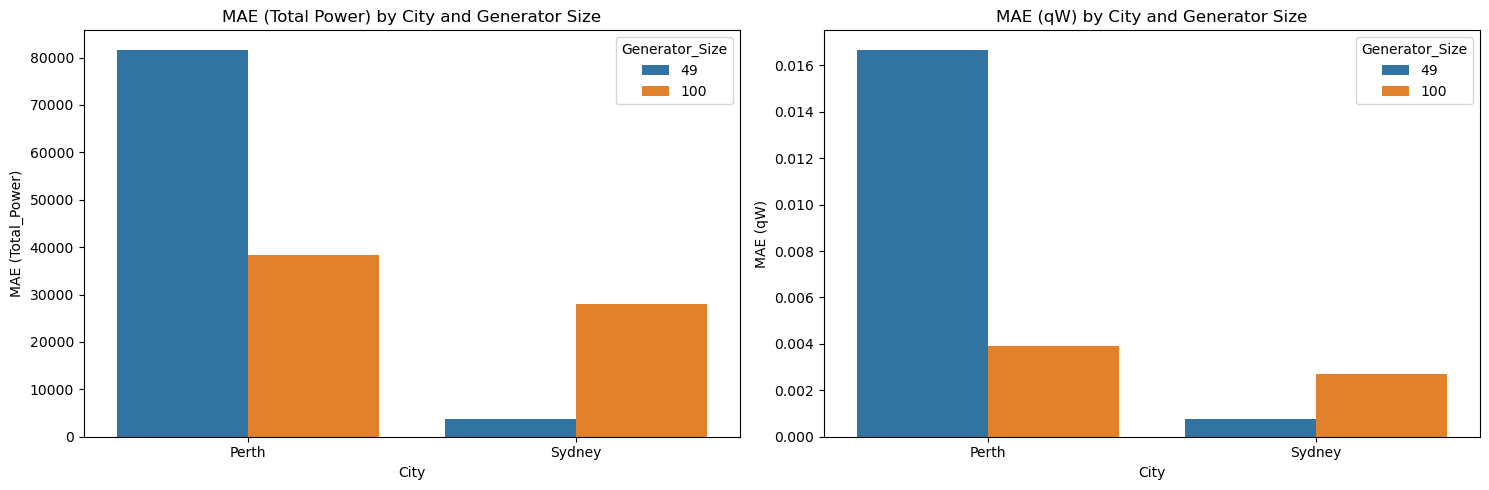

In [94]:
# MAE for qW and Total Power
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=grouped_metric, x="City", y="MAE (Total_Power)", hue="Generator_Size",palette=custom_palette, ax=axs[0])
axs[0].set_title("MAE (Total Power) by City and Generator Size")

sns.barplot(data=grouped_metric,x="City",y="MAE (qW)",hue="Generator_Size",palette=custom_palette,ax=axs[1])
axs[1].set_title("MAE (q-factor) by City and Generator Size")


plt.tight_layout()
plt.show()

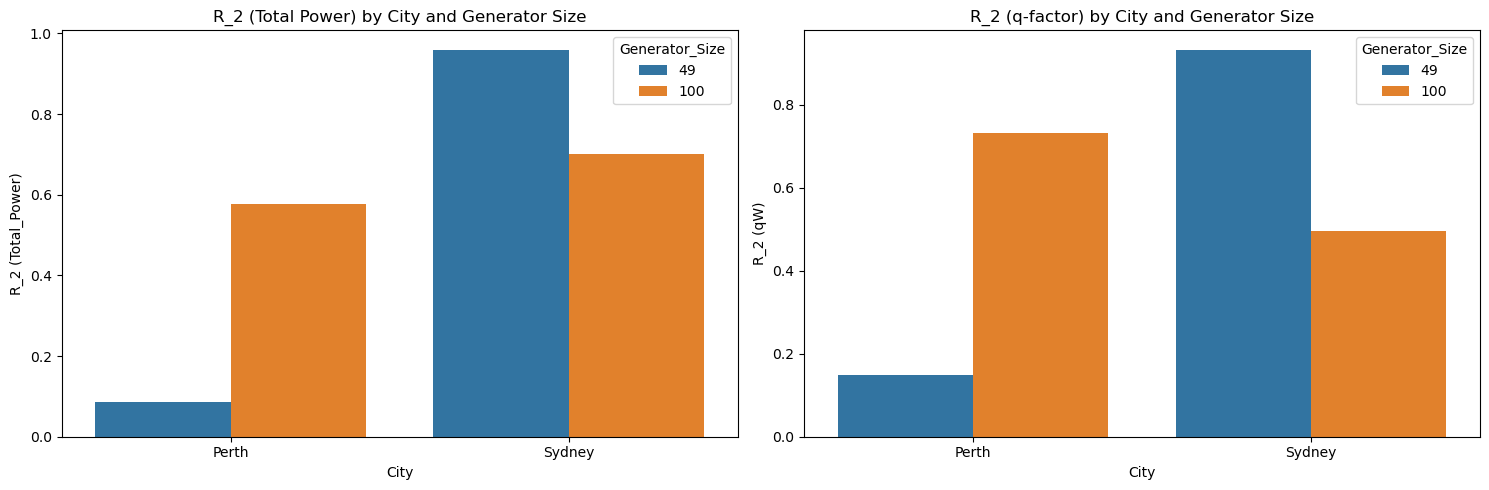

In [97]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.barplot(data=grouped_metric, x="City", y="R_2 (Total_Power)", hue="Generator_Size",palette=custom_palette, ax=axs[0])
axs[0].set_title("R_2 (Total Power) by City and Generator Size")

sns.barplot(data=grouped_metric,x="City",y="R_2 (qW)",hue="Generator_Size",palette=custom_palette,ax=axs[1])
axs[1].set_title("R_2 (q-factor) by City and Generator Size")


plt.tight_layout()
plt.show()

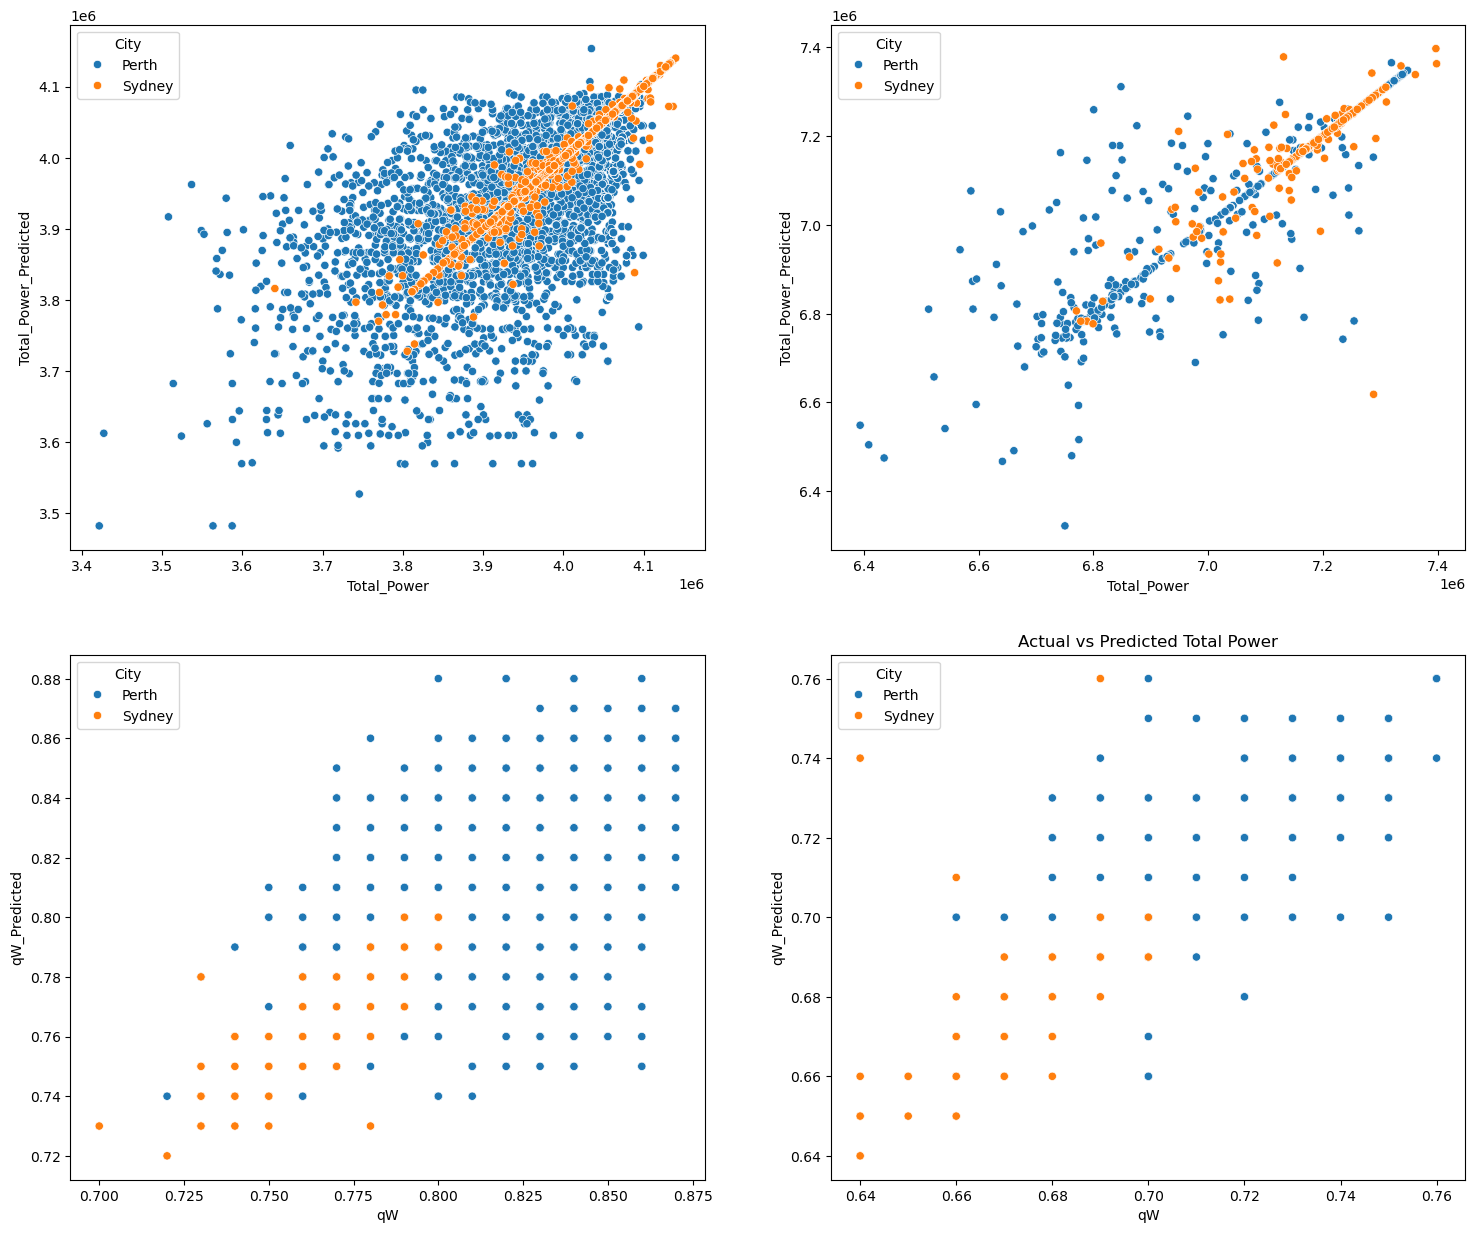

In [70]:
# Scatter Plot for Total Power
fig,axs = plt.subplots(2,2,figsize=(18,15))
sns.scatterplot(data=df_prediction_compare.loc[df_prediction_compare["Generator_Size"]==49], x="Total_Power", y="Total_Power_Predicted", hue="City",ax=axs[0,0])
sns.scatterplot(data=df_prediction_compare.loc[df_prediction_compare["Generator_Size"]==100], x="Total_Power", y="Total_Power_Predicted", hue="City",ax=axs[0,1])
plt.title("Actual vs Predicted Total Power")
#plt.xlabel("Actual Total Power")
#plt.ylabel("Predicted Total Power")


# Scatter Plot for qW
sns.scatterplot(data=df_prediction_compare.loc[df_prediction_compare["Generator_Size"]==49], x="qW", y="qW_Predicted", hue="City",ax=axs[1,0])
sns.scatterplot(data=df_prediction_compare.loc[df_prediction_compare["Generator_Size"]==100], x="qW", y="qW_Predicted", hue="City",ax=axs[1,1])

plt.show()


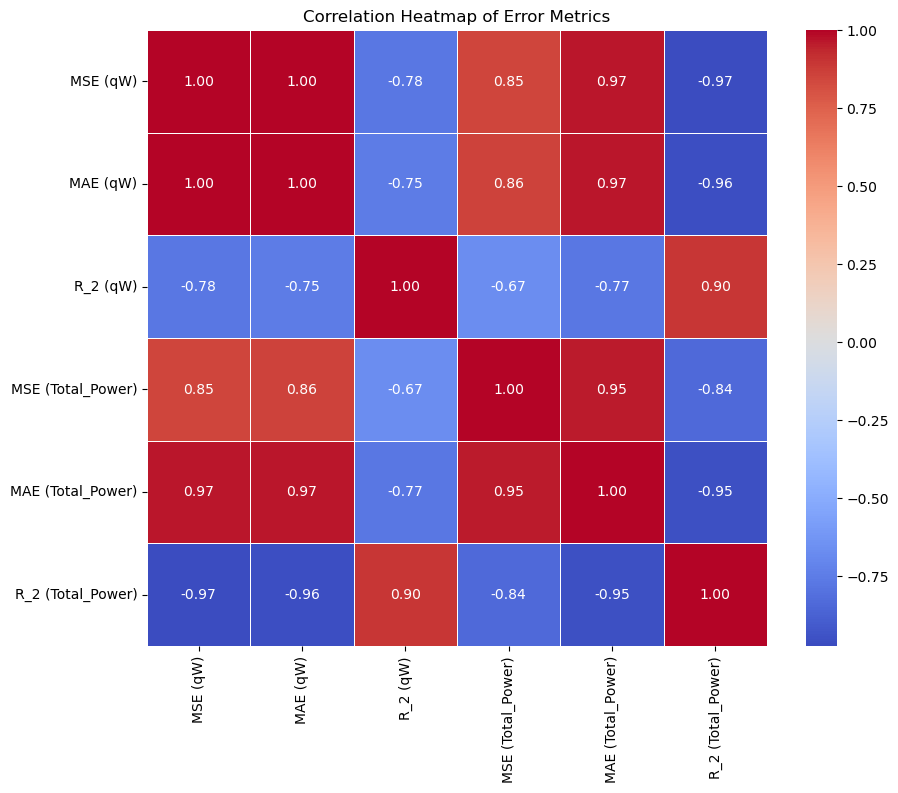

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
correlation_matrix = grouped_metric[["MSE (qW)", "MAE (qW)", "R_2 (qW)", "MSE (Total_Power)", "MAE (Total_Power)", "R_2 (Total_Power)"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Error Metrics")
plt.show()

In [89]:
df_unseen_prediction.columns

Index(['X1', 'Y1', 'X2', 'Y2', 'X3', 'Y3', 'X4', 'Y4', 'X5', 'Y5',
       ...
       'X98', 'Y98', 'X99', 'Y99', 'X100', 'Y100', 'City', 'Generator_Size',
       'qW_Predicted', 'Total_Power_Predicted'],
      dtype='object', length=204)

# 6. Desgin UI


            X1          Y1          X2        Y2          X3          Y3  \
0  1398.932534  897.816919  120.796476  11.59497  840.720562  930.601123   

           X4          Y4          X5          Y5          X6           Y6  \
0  129.329418  112.749116  703.162081  479.558805  199.401044  1013.315835   

            X7           Y7         X8          Y8          X9          Y9  \
0  1045.418741  1028.962634  47.700013  889.320321  852.071879  804.138912   

          X10         Y10        X11         Y11         X12        Y12  \
0  455.715651  766.484972  14.975254  682.957096  126.466355  260.67636   

          X13         Y13          X14        Y14        X15         Y15  \
0  426.222397  385.556339  1378.287576  836.93485  15.729014  892.894724   

          X16         Y16         X17         Y17         X18         Y18  \
0  970.200639  381.567833  809.020431  657.174034  791.115129  380.190804   

          X19         Y19        X20          Y20          X21       Y21  

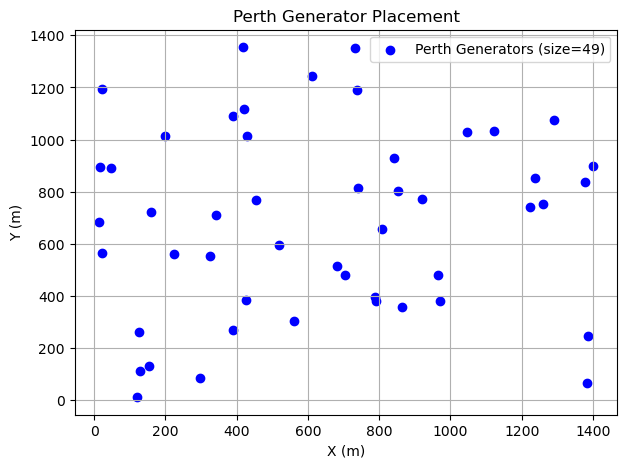

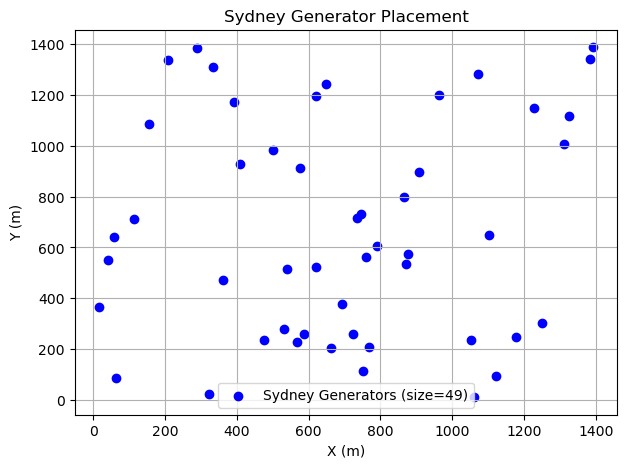

In [176]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


# Global variable to store the DataFrame
df_global = None


# Function to generate random coordinates and calculate total power
def generate_and_display(city, size):
    global df_global  # Access the global DataFrame variable
    
    # Generate random coordinates for generators
    x_coords = np.random.uniform(0, 1400, size)
    y_coords = np.random.uniform(0, 1400, size)


    # Create a DataFrame for generator coordinates with columns X1, Y1, ...
    data = {}
    for i in range(size):
        data[f"X{i+1}"]= [x_coords[i]]
        data[f"Y{i+1}"] = [y_coords[i]]                
 
    # Pad with zeros if size < 100
    if size < 100:
        for i in range(size, 100):
            data[f"X{i+1}"] = [0]
            data[f"Y{i+1}"] = [0]
            
    df_coordination = pd.DataFrame(data)   
    df_coordination["City"] = city
    df_coordination["Generator_Size"] = size

    
    print(df_coordination)
     
    # Store the DataFrame in the global variable
    df_global = df_coordination

    # Predict total power and q_factor using models
    if city == "Perth":
        total_power = perth_best_train_model_Total_Power.predict(df_coordination)
        q_factor = perth_best_train_model_qW.predict(df_coordination)
    else:
        total_power = sydney_best_train_model_Total_Power.predict(df_coordination)
        q_factor = sydney_best_train_model_qW.predict(df_coordination)

    
    # Display the plot
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(x_coords, y_coords, color='blue', label=f'{city} Generators (size={size})')
    ax.set_title(f'{city} Generator Placement')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.legend()
    ax.grid(True)

    # Clear previous canvas if any
    for widget in frame_plot.winfo_children():
        widget.destroy()

    # Embed the plot in the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=frame_plot)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    canvas.draw()

    # Display total power
    output_text.set(f'Genator size={size} in {city}: \nTotal Power: {total_power[0]:.2f} \nq_factor: {q_factor[0]:.2f}')
    return df_coordination



# Create the main Tkinter window
root = tk.Tk()
root.title("Generator Placement & Power Prediction")
root.geometry("800x800")  # Set the window size (Width x Height)


# Create frames for layout
intro_text = tk.Label(root, text="Let's arrange the layout of Generators in a wave farm!", font=("Arial", 18, "bold"), pady=20)
intro_text.pack(side=tk.TOP, fill=tk.X)

frame_controls = tk.Frame(root, padx=10, pady=10)
frame_controls.pack(side=tk.TOP, fill=tk.X)

frame_plot = tk.Frame(root, padx=10, pady=10)
frame_plot.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

frame_output = tk.Frame(root, padx=10, pady=10, bg="#f0f0f0")
frame_output.pack(side=tk.TOP, fill=tk.X)


# Dropdown to select city
city_label = tk.Label(frame_controls, text="Select City:", font=("Arial", 12))
city_label.pack(side=tk.LEFT, padx=5)

city_var = tk.StringVar(value="Perth")
city_dropdown = ttk.Combobox(
    frame_controls, textvariable=city_var, values=["Perth", "Sydney"], state="readonly", font=("Arial", 12)
)
city_dropdown.pack(side=tk.LEFT, padx=5)

# Buttons to place generators with size 49 and 100
btn_place_generators_49 = tk.Button(
    frame_controls,
    text="Place Your Generators \n  (Size=49)",
    command=lambda: generate_and_display(city_var.get(), size=49),
    bg="lightblue",
    font=("Arial", 10),
    relief="solid",
    width=25
)
btn_place_generators_49.pack(side=tk.LEFT, padx=5)

btn_place_generators_100 = tk.Button(
    frame_controls,
    text="Place Your Generators \n  (Size=100)",
    command=lambda: generate_and_display(city_var.get(), size=100),
    bg="lightgreen",
    font=("Arial", 10),
    relief="solid",
    width=25
)
btn_place_generators_100.pack(side=tk.LEFT, padx=5)

# Label to display the total power output
output_text = tk.StringVar()
output_text.set("")
label_output = tk.Label(frame_output, textvariable=output_text, font=("Arial", 14, "bold"), bg="#f0f0f0", justify="left")
label_output.pack(side=tk.TOP, padx=10, pady=10, anchor="center")

# Run the Tkinter main loop
root.mainloop()

In [159]:
df_global_to_be_predict = df_global.copy()
df_global_prediction = df_global.copy()

In [143]:
df_global_to_be_predict

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12,X13,Y13,X14,Y14,X15,Y15,X16,Y16,X17,Y17,X18,Y18,X19,Y19,X20,Y20,X21,Y21,X22,Y22,X23,Y23,X24,Y24,X25,Y25,X26,Y26,X27,Y27,X28,Y28,X29,Y29,X30,Y30,X31,Y31,X32,Y32,X33,Y33,X34,Y34,X35,Y35,X36,Y36,X37,Y37,X38,Y38,X39,Y39,X40,Y40,X41,Y41,X42,Y42,X43,Y43,X44,Y44,X45,Y45,X46,Y46,X47,Y47,X48,Y48,X49,Y49,X50,Y50,X51,Y51,X52,Y52,X53,Y53,X54,Y54,X55,Y55,X56,Y56,X57,Y57,X58,Y58,X59,Y59,X60,Y60,X61,Y61,X62,Y62,X63,Y63,X64,Y64,X65,Y65,X66,Y66,X67,Y67,X68,Y68,X69,Y69,X70,Y70,X71,Y71,X72,Y72,X73,Y73,X74,Y74,X75,Y75,X76,Y76,X77,Y77,X78,Y78,X79,Y79,X80,Y80,X81,Y81,X82,Y82,X83,Y83,X84,Y84,X85,Y85,X86,Y86,X87,Y87,X88,Y88,X89,Y89,X90,Y90,X91,Y91,X92,Y92,X93,Y93,X94,Y94,X95,Y95,X96,Y96,X97,Y97,X98,Y98,X99,Y99,X100,Y100,City,Generator_Size
0,56.100235,86.512252,87.179188,67.819906,81.359395,15.969212,16.662631,81.033309,74.907807,21.363012,70.950697,76.079137,95.517932,28.278754,5.304826,35.137795,6.166908,36.636907,59.883767,93.963971,44.486402,67.829982,93.437693,32.803881,2.309575,48.813543,42.43702,93.28505,51.108267,35.593295,44.611512,69.865367,60.691693,12.709853,12.033993,70.934671,86.754336,20.343267,91.525793,59.058029,43.038686,37.604623,99.959131,67.897374,85.135044,43.576408,99.247777,95.377165,19.437504,49.590449,91.505377,45.744285,54.743755,99.861368,14.064093,42.74944,57.963966,64.712611,37.713507,30.689215,42.738605,22.434994,99.314592,14.160618,16.691367,27.166644,28.989887,60.215224,56.864717,22.868948,14.959291,70.288332,73.389441,58.346294,44.521775,6.092156,54.190039,67.519264,6.608311,50.079369,92.34285,24.183202,90.733082,58.704324,50.6896,89.548797,34.495319,90.247991,7.135267,65.825216,92.368434,21.548747,63.372141,76.127413,49.736096,96.229135,88.106991,31.496433,93.850679,41.501048,75.869928,25.582379,24.786637,23.195184,84.932797,56.237316,92.534212,49.02218,46.284769,5.517117,77.2367,49.147474,85.52452,25.745963,62.859516,41.896665,86.742743,20.973251,11.702051,42.412491,84.624306,8.556765,53.43694,40.419851,11.024774,95.228878,50.781195,83.096995,92.858829,13.633825,31.547413,60.229454,55.486773,46.692411,84.632892,9.967061,86.963648,0.98117,38.381671,47.315478,93.559431,61.975746,4.186487,24.219757,64.657289,86.070515,78.340167,58.433243,67.322379,28.575352,49.703451,81.202876,57.111491,41.004988,55.240924,65.309442,75.296659,77.169068,50.936031,49.241813,37.372629,2.764139,40.83967,9.465336,27.47856,75.08441,68.26071,36.908099,38.886759,64.337139,81.269116,76.711813,12.980194,98.001598,94.062978,37.002713,46.031969,62.151946,38.506753,33.150868,9.954929,62.86552,39.20649,67.070556,99.660931,66.085815,20.604535,42.58943,96.443849,26.27244,81.59635,41.54517,92.827318,26.523824,58.890035,81.662072,13.905805,55.504488,73.802822,11.440035,Perth,100


In [142]:
df_global_prediction["Total_Power_Predicted"] = sydney_best_train_model_Total_Power.predict(df_global_to_be_predict)

df_global_prediction

ValueError: Found unknown categories ['Perth'] in column 0 during transform

In [ ]:
df_global_prediction["Total_Power_Predicted"] = perth_best_train_model_Total_Power.predict(df_global_to_be_predict)

df_global_prediction

In [150]:
perth_best_train_model_Total_Power.predict(df_perth_unseen_to_be_predict.iloc[3700:])

array([7092504.86      , 7253506.53      , 6751963.67      ,
       7177569.52      , 7107540.24      , 7282260.68      ,
       7312486.52      , 6770846.23      , 7155957.54      ,
       7177717.83      , 7307006.96      , 6957278.28      ,
       7197233.4       , 7149004.13      , 7170866.70999999,
       7174392.32      , 7242071.61      , 6809788.78      ,
       7029940.39      , 6984547.93      , 7030751.31      ,
       7133011.25      , 6760261.62      , 7230085.84      ,
       7173912.54      , 7190394.49      , 7118098.74      ,
       7238880.49      , 7283113.68      , 7064020.69      ,
       6834264.46      , 7275907.27      , 7156790.95      ,
       7114622.83      , 7221333.4       , 7056868.31      ,
       7257985.04      , 6794917.49      , 6996684.89      ,
       6859862.78      , 7014705.54      , 7242071.61      ,
       7035887.43      , 6962312.57      , 7236666.48      ,
       7282413.61      , 7174392.32      , 7280804.85      ,
       7280415.08      ,